In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import KBinsDiscretizer  
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.width', None)  # Don’t wrap columns

In [3]:
data = pd.read_excel("dados_ceres.xlsx")
df = pd.DataFrame(data)
df.set_index('date', inplace=True)

filter_index = pd.to_datetime('01/2025', format='%m/%Y')
df = df[pd.to_datetime(df.index, format='%m/%Y') <= filter_index]
df = df.dropna()

mnpr3_position = df.columns.get_loc('MNPR3')

for col in df.columns:
    df[col] = df[col].astype(str).str.rstrip('%').astype(float)

print(f"Final dataframe shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Final dataframe shape: (203, 62)
Columns: ['var ONI', 'var N temp', 'var NE temp', 'var CO temp', 'var SE temp', 'var S temp', 'var_pluv_N', 'var_pluv_NE', 'var_pluv_CO', 'var_pluv_SE', 'var_pluv_S', 'CDI (%)', 'Dolar (%)', 'IPPA Grãos (%)', 'IPPA Pecuária (%)', 'IPPA Hotifrutícolas (%)', 'IBOV (%)', 'IPPA (%)', 'VAR_ipe-agro', 'VAR_ive-agro', 'VAR_ice', 'VAR_iper-agro', 'var açucar', 'var boigordo', 'var milho', 'var soja', 'riscobr', 'MNPR3', 'ABEV3', 'BAUH4', 'JOPA4', 'MDIA3', 'MTSA4', 'SMTO3', 'RANI3', 'MSPA4', 'SUZB3', 'CSAN3', 'KEPL3', 'RAPT4', 'TUPY3', 'WLMM4', 'LUXM4', 'FHER3', 'DXCO3', 'EUCA4', 'AGRO3', 'SLCE3', 'BRFS3', 'MRFG3', 'BEEF3', 'CEDO4', 'CTNM4', 'DOHL4', 'CTKA4', 'PTNT4', 'SNSY5', 'CTSA4', 'SGPS3', 'TXRX4', 'CGRA4', 'PCAR3']


,var ONI,var N temp,var NE temp,var CO temp,var SE temp,var S temp,var_pluv_N,var_pluv_NE,var_pluv_CO,var_pluv_SE,var_pluv_S,CDI (%),Dolar (%),IPPA Grãos (%),IPPA Pecuária (%),IPPA Hotifrutícolas (%),IBOV (%),IPPA (%),VAR_ipe-agro,VAR_ive-agro,VAR_ice,VAR_iper-agro,var açucar,var boigordo,var milho,var soja,riscobr,MNPR3,ABEV3,BAUH4,JOPA4,MDIA3,MTSA4,SMTO3,RANI3,MSPA4,SUZB3,CSAN3,KEPL3,RAPT4,TUPY3,WLMM4,LUXM4,FHER3,DXCO3,EUCA4,AGRO3,SLCE3,BRFS3,MRFG3,BEEF3,CEDO4,CTNM4,DOHL4,CTKA4,PTNT4,SNSY5,CTSA4,SGPS3,TXRX4,CGRA4,PCAR3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
02/2008,-0.1069,9.736111,-1.020345,-0.600765,-0.393364,-0.550433,-1.005194,3.077184,-0.593753,0.576932,-0.161522,-0.1304,-0.0226,-0.0172,-0.0052,-0.0498,0.0672,-0.0103,0.0100,-0.0402,-0.0298,-0.0202,0.0463,0.0032,-0.1015,0.0430,0.3109,16.149072,13.274261,-2.494324,-6.666665,10.077460,4.081656,9.195420,42.424274,0.000000,0.0,7.037018,-5.128238,9.589044,21.027451,14.356883,-3.750046,19.166672,18.131883,-5.320578,13.000003,23.809529,4.499248,16.197191,8.974338,-0.029847,20.886081,8.938554,12.632176,0.724619,17.499995,-4.878043,-3.030311,-8.064516,1.529599,0.000000
03/2008,-0.1620,0.212786,56.648087,2.110300,0.226603,-0.530129,-100.124274,2.286906,-0.001939,0.941343,2.001907,0.0500,-0.0116,-0.0262,0.0207,0.0000,-0.0397,0.0052,-0.0616,0.1339,-0.0187,-0.0791,0.0473,0.0179,-0.0216,-0.0386,0.1753,-1.069519,-9.382787,10.116263,3.571438,-17.840323,-3.921590,-11.228052,-25.531906,-3.226147,0.0,-11.418675,-5.405385,-16.875001,-3.791725,-0.990099,-5.194853,-12.138526,-6.976766,-14.985594,-2.212400,-1.961562,-2.943299,6.060626,-6.470577,13.466703,-9.214660,-1.282067,-3.061532,0.000000,17.021281,2.564099,-1.562495,5.263161,-7.405233,0.000000
04/2008,-0.2269,-0.922442,-0.891294,-0.351697,-1.487831,5.606265,-0.515126,-0.387475,0.244442,-0.064315,1.914861,0.0714,-0.0117,-0.0090,0.0051,-0.0131,0.1132,0.0309,-0.0468,0.2630,-0.0217,-0.0675,0.0244,0.0138,-0.0210,-0.0279,-0.3152,26.162155,-2.872089,-30.200624,17.807077,35.941056,0.000000,2.766790,5.714260,-11.101240,0.0,16.796860,8.571425,11.278225,8.882307,3.999990,0.000000,27.727508,6.999996,-1.694922,-2.262435,23.185605,14.979549,10.857139,23.899370,-8.026323,-12.341412,2.571444,-1.147493,-1.870490,9.090909,-20.000006,-12.380959,-11.666663,-14.956243,0.000000
05/2008,-0.1848,3.720941,3.779561,-0.740620,0.622207,0.746928,1.534573,-0.592033,-1.091475,-0.821403,-0.812564,-0.0333,-0.0178,0.0271,0.0505,0.0398,0.0696,0.0500,-0.0977,0.4606,-0.0350,-0.1293,-0.0498,0.0425,0.0304,-0.0015,0.0000,-14.224506,-5.495522,-4.235997,5.852935,8.510667,3.673485,-5.769253,-18.823341,-5.012497,0.0,-14.381260,5.263193,21.621572,12.452021,26.923089,0.000000,-2.125001,7.943963,3.448283,15.740753,0.318444,16.262296,21.649451,14.213211,0.000000,5.263158,-1.494053,0.106497,-12.096757,-7.499997,50.000000,8.695657,13.207543,5.960305,3.741182
06/2008,-0.2800,1.758199,0.366307,7.106214,-1.860525,-0.780930,-0.836402,-0.355024,0.902910,0.429604,2.607861,0.0920,-0.0241,0.0485,0.0962,0.0043,-0.1043,0.0190,0.0792,-0.1991,-0.0432,0.0326,-0.0206,0.1367,-0.0201,0.1222,0.0000,-20.079919,-8.102917,-1.895736,-8.307851,-9.803925,-1.574792,5.714296,23.258886,0.000000,0.0,8.203135,0.000000,-11.833322,-7.317068,-6.060606,0.000000,2.085993,-4.761937,0.666656,4.079981,1.587294,-18.762927,-12.076254,-24.444461,-12.675248,-1.249999,-4.909996,7.446813,-4.253571,21.621617,4.583368,-5.000004,5.000003,-2.847221,0.000000


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
import warnings


# Define the cluster variables
cluster_var = [
    "var_pluv_N", 'var_pluv_NE', "var_pluv_CO", "var_pluv_SE", "var_pluv_S", 
    'var N temp', "var NE temp", "var CO temp", "var SE temp", "var S temp", 'var ONI',
    "MNPR3", "ABEV3", "BAUH4", "JOPA4", "MDIA3", "MTSA4", "SMTO3", "RANI3", "MSPA4", "SUZB3", 
    "CSAN3", "KEPL3", "RAPT4", "TUPY3", 'WLMM4', "LUXM4", "FHER3", "DXCO3", "EUCA4", 
    "AGRO3", "SLCE3", "BRFS3", "MRFG3", "BEEF3", "CEDO4", "CTNM4", "DOHL4", 'CTKA4', 
    'PTNT4', "SNSY5", "CTSA4", 'SGPS3', "TXRX4", "CGRA4", 'PCAR3'
]

# --- 2. Your First Loop (K-Means Binning for first 11 vars) ---
# This part is correct and working for you.
print("\n--- Running Loop 1 (K-Means Binning) ---")
# Suppress warnings from KBinsDiscretizer for empty bins
warnings.filterwarnings('ignore', category=UserWarning)

for var in cluster_var[:11]:
    if var in df.columns:
        try:
            # Ensure this column is also numeric before binning
            col_data = pd.to_numeric(df[var], errors='coerce').fillna(0) # fill NaNs with 0
            
            discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
            bins = discretizer.fit_transform(col_data.values.reshape(-1, 1)).flatten().astype(int)
            
            df[var] = bins
            print(f"{var} - Bin distribution:")
            print(pd.Series(bins).value_counts().sort_index())
        except Exception as e:
            print(f"Error processing {var} in Loop 1: {e}")
    else:
        print(f"Warning: Column '{var}' not found in DataFrame.")
print("--- Loop 1 Complete ---")


# --- 3. The Corrected Second Loop (Threshold Binning) ---
print("\n--- Running Loop 2 (Fixed Threshold Binning) ---")
lower_threshold = -3
upper_threshold = 3

for var in cluster_var[11:]:
    if var in df.columns:
        print(f"\nProcessing Column: {var}")
        
        # --- Diagnosis: Check original type ---
        print(f"  Original Data Type: {df[var].dtype}")

        # --- THE FIX: Force the column to be numeric ---
        # errors='coerce' turns blanks and non-numeric text into 'NaN'
        numeric_col = pd.to_numeric(df[var], errors='coerce')

        # --- Diagnosis: Print Min/Max *after* conversion ---
        print(f"  Numeric Min Value: {numeric_col.min():.6f}")
        print(f"  Numeric Max Value: {numeric_col.max():.6f}")

        # --- Binning Logic ---
        # This now compares numbers, not strings.
        # NaN values will correctly be binned as '1'
        binned_data = np.where(numeric_col <= lower_threshold, 0,
                               np.where(numeric_col >= upper_threshold, 2, 1))
        
        # Overwrite the original column with the new integer-binned data
        df[var] = binned_data.astype(int)

        # --- Print new distribution ---
        print(f"  {var} - Final Bin distribution:")
        print(df[var].value_counts().sort_index())
    else:
        print(f"Warning: Column '{var}' not found in DataFrame.")
print("--- Loop 2 Complete ---")


# --- 4. Display the FINAL result ---
print("\n--- Final DataFrame Head ---")
print(df.head())


--- Running Loop 1 (K-Means Binning) ---
var_pluv_N - Bin distribution:
0      1
1      2
2    188
3     11
4      1
Name: count, dtype: int64
var_pluv_NE - Bin distribution:
0      1
1      5
2    195
3      1
4      1
Name: count, dtype: int64
var_pluv_CO - Bin distribution:
0      8
1    107
2     78
3      9
4      1
Name: count, dtype: int64
var_pluv_SE - Bin distribution:
0      1
1      1
2    199
3      1
4      1
Name: count, dtype: int64
var_pluv_S - Bin distribution:
0      1
1    195
2      5
3      1
4      1
Name: count, dtype: int64
var N temp - Bin distribution:
0      1
1      5
2    187
3      9
4      1
Name: count, dtype: int64
var NE temp - Bin distribution:
0      1
1    181
2     15
3      5
4      1
Name: count, dtype: int64
var CO temp - Bin distribution:
0      2
1    186
2     13
3      1
4      1
Name: count, dtype: int64
var SE temp - Bin distribution:
0      1
1      1
2      3
3    197
4      1
Name: count, dtype: int64
var S temp - Bin distribution:
0  

In [5]:
from sklearn.preprocessing import RobustScaler

df.index = pd.to_datetime(df.index, format='%m/%Y')
df['month'] = df.index.month

df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

df = df.drop(columns=['month'])

categorical_var_lagged = [
    "var_pluv_N", 'var_pluv_NE', "var_pluv_CO", "var_pluv_SE", "var_pluv_S", 
    'var N temp', "var NE temp", "var CO temp", "var SE temp", "var S temp", 'var ONI',
    "MNPR3", "ABEV3", "BAUH4", "JOPA4", "MDIA3", "MTSA4", "SMTO3", "RANI3", "MSPA4", "SUZB3", 
    "CSAN3", "KEPL3", "RAPT4", "TUPY3", 'WLMM4', "LUXM4", "FHER3", "DXCO3", "EUCA4", 
    "AGRO3", "SLCE3", "BRFS3", "MRFG3", "BEEF3", "CEDO4", "CTNM4", "DOHL4", 'CTKA4', 
    'PTNT4', "SNSY5", "CTSA4", 'SGPS3', "TXRX4", "CGRA4", 'PCAR3', 'month_sin', 'month_cos'
]


# Get all columns except target and categorical variables
all_cols = df.columns.tolist()
cols_to_scale = [col for col in all_cols if col not in categorical_var_lagged]
categorical_cols_present = [col for col in categorical_var_lagged if col in df.columns]

df_scaled = df.copy()

scaler_X = RobustScaler()
df_scaled[cols_to_scale] = scaler_X.fit_transform(df[cols_to_scale])

df_scaled.describe()

,var ONI,var N temp,var NE temp,var CO temp,var SE temp,var S temp,var_pluv_N,var_pluv_NE,var_pluv_CO,var_pluv_SE,var_pluv_S,CDI (%),Dolar (%),IPPA Grãos (%),IPPA Pecuária (%),IPPA Hotifrutícolas (%),IBOV (%),IPPA (%),VAR_ipe-agro,VAR_ive-agro,VAR_ice,VAR_iper-agro,var açucar,var boigordo,var milho,var soja,riscobr,MNPR3,ABEV3,BAUH4,JOPA4,MDIA3,MTSA4,SMTO3,RANI3,MSPA4,SUZB3,CSAN3,KEPL3,RAPT4,TUPY3,WLMM4,LUXM4,FHER3,DXCO3,EUCA4,AGRO3,SLCE3,BRFS3,MRFG3,BEEF3,CEDO4,CTNM4,DOHL4,CTKA4,PTNT4,SNSY5,CTSA4,SGPS3,TXRX4,CGRA4,PCAR3,month_sin,month_cos
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,2.030000e+02,2.030000e+02
mean,2.950739,2.019704,1.133005,1.078818,2.965517,1.044335,2.044335,1.980296,1.448276,2.000000,1.044335,0.041929,0.059028,0.003560,0.070688,0.104024,-0.009069,0.027347,-0.028901,0.247489,-0.021633,0.048412,0.142074,0.058554,0.049498,-0.004903,0.137614,0.931034,1.108374,1.054187,1.059113,1.054187,1.034483,1.073892,1.088670,0.975369,1.044335,1.088670,1.044335,1.024631,1.049261,1.123153,1.004926,0.945813,1.029557,1.009852,1.059113,1.073892,1.049261,0.980296,0.935961,0.935961,0.862069,1.009852,0.817734,1.059113,0.886700,0.926108,0.832512,0.793103,1.088670,1.044335,-2.463054e-03,-4.266135e-03
std,0.394939,0.329425,0.452763,0.363828,0.288034,0.303454,0.319351,0.262520,0.668258,0.222497,0.303454,0.708084,0.835776,0.808168,0.806296,0.847355,0.792536,0.762746,0.892065,1.110253,0.855983,0.817363,0.980188,1.017549,0.781203,0.768779,0.951232,0.876069,0.782278,0.765610,0.642129,0.891111,0.804562,0.872834,0.797285,0.460719,0.591194,0.839625,0.857700,0.892424,0.842872,0.838201,0.671171,0.907624,0.900557,0.850103,0.818386,0.867144,0.877404,0.917166,0.895996,0.814982,0.862124,0.731133,0.885125,0.806197,0.891084,0.849845,0.890837,0.853967,0.809608,0.591194,7.097230e-01,7.079685e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.441211,-1.926645,-1.966754,-2.050314,-2.100893,-3.708561,-2.281081,-2.280308,-1.645197,-2.143177,-2.055879,-4.264946,-2.943221,-2.519016,-2.102603,-1.729455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,-0.473225,-0.505933,-0.524059,-0.433962,-0.450893,-0.489982,-0.505405,-0.487036,-0.406386,-0.598434,-0.464494,-0.417120,-0.543453,-0.456376,-0.535988,-0.471336,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.830127e-01,-6.830127e-01
50%,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [6]:
print("=== Creating Individual DataFrames for Each Stock Variable ===\n")

# Define categorical variables to lag by 8 months
categorical_vars = [
    "var_pluv_N", 'var_pluv_NE', "var_pluv_CO", "var_pluv_SE", "var_pluv_S", 
    'var N temp', "var NE temp", "var CO temp", "var SE temp", "var S temp", 'var ONI'
]

# Create 8-month lag for categorical variables
print(f"Creating 8-month lag features for {len(categorical_vars)} categorical variables...")
for col in categorical_vars:
    if col in df.columns:
        lag_col_name = f"{col}_lag8"
        df[lag_col_name] = df[col].shift(8)
        print(f"  Created: {lag_col_name}")

# Drop original categorical variables after creating lags
cols_to_drop = [col for col in categorical_vars if col in df.columns]
df = df.drop(columns=cols_to_drop)

# Define all stock variables
cluster_var = [
    "MNPR3", "ABEV3", "BAUH4", "JOPA4", "MDIA3", "MTSA4", "SMTO3", "RANI3", "MSPA4", "SUZB3", 
    "CSAN3", "KEPL3", "RAPT4", "TUPY3", 'WLMM4', "LUXM4", "FHER3", "DXCO3", "EUCA4", 
    "AGRO3", "SLCE3", "BRFS3", "MRFG3", "BEEF3", "CEDO4", "CTNM4", "DOHL4", 'CTKA4', 
    'PTNT4', "SNSY5", "CTSA4", 'SGPS3', "TXRX4", "CGRA4", 'PCAR3'
]

# Dictionary to store all individual dataframes
stock_dataframes = {}

print(f"\n=== Creating Individual DataFrames and Lag Features ===")
for var in cluster_var:
    if var in df.columns:
        # Create a copy of the main dataframe for this stock
        df_var = df.copy()
        
        # Create lag features for this specific stock
        df_var[f'{var}_lag3'] = df_var[var].shift(3)
        df_var[f'{var}_lag1'] = df_var[var].shift(1)
        
        # Remove rows with NaN values
        df_var = df_var.dropna()
        
        # Store in dictionary and create a variable with the name df_{var}
        stock_dataframes[var] = df_var
        globals()[f'df_{var}'] = df_var
        
        print(f"  Created: df_{var} with shape {df_var.shape}")
        print(f"    Features: {var}, {var}_lag3, {var}_lag1")
    else:
        print(f"  Warning: {var} not found in dataframe")

print(f"\n=== Summary ===")
print(f"Total individual dataframes created: {len(stock_dataframes)}")
print(f"Each dataframe contains:")
print(f"  - All lagged categorical variables (8-month lag)")
print(f"  - The specific stock variable with its 3-month and 1-month lags")
print(f"  - All other variables from the original dataframe")

# Display example of first dataframe
if cluster_var[0] in df.columns:
    print(f"\n=== Example: df_{cluster_var[0]} ===")
    print(globals()[f'df_{cluster_var[0]}'].head())

=== Creating Individual DataFrames for Each Stock Variable ===

Creating 8-month lag features for 11 categorical variables...
  Created: var_pluv_N_lag8
  Created: var_pluv_NE_lag8
  Created: var_pluv_CO_lag8
  Created: var_pluv_SE_lag8
  Created: var_pluv_S_lag8
  Created: var N temp_lag8
  Created: var NE temp_lag8
  Created: var CO temp_lag8
  Created: var SE temp_lag8
  Created: var S temp_lag8
  Created: var ONI_lag8

=== Creating Individual DataFrames and Lag Features ===
  Created: df_MNPR3 with shape (195, 66)
    Features: MNPR3, MNPR3_lag3, MNPR3_lag1
  Created: df_ABEV3 with shape (195, 66)
    Features: ABEV3, ABEV3_lag3, ABEV3_lag1
  Created: df_BAUH4 with shape (195, 66)
    Features: BAUH4, BAUH4_lag3, BAUH4_lag1
  Created: df_JOPA4 with shape (195, 66)
    Features: JOPA4, JOPA4_lag3, JOPA4_lag1
  Created: df_MDIA3 with shape (195, 66)
    Features: MDIA3, MDIA3_lag3, MDIA3_lag1
  Created: df_MTSA4 with shape (195, 66)
    Features: MTSA4, MTSA4_lag3, MTSA4_lag1
  Creat

In [7]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

print("=== Creating Time Series Folds for Each Stock DataFrame ===\n")

# Define all stock variables
cluster_var = [
    "MNPR3", "ABEV3", "BAUH4", "JOPA4", "MDIA3", "MTSA4", "SMTO3", "RANI3", "MSPA4", "SUZB3", 
    "CSAN3", "KEPL3", "RAPT4", "TUPY3", 'WLMM4', "LUXM4", "FHER3", "DXCO3", "EUCA4", 
    "AGRO3", "SLCE3", "BRFS3", "MRFG3", "BEEF3", "CEDO4", "CTNM4", "DOHL4", 'CTKA4', 
    'PTNT4', "SNSY5", "CTSA4", 'SGPS3', "TXRX4", "CGRA4", 'PCAR3'
]

# Dictionary to store all folds for all stocks
all_stock_folds = {}

for var in cluster_var:
    df_var_name = f'df_{var}'
    
    # Check if the dataframe exists
    if df_var_name in globals():
        df_current = globals()[df_var_name]
        
        n_samples = len(df_current)
        fold_size = n_samples // 6
        
        print(f"\n=== Creating folds for {var} ===")
        print(f"Total samples: {n_samples}")
        print(f"Fold size: {fold_size}")
        
        folds_var = []
        
        for fold in range(1, 6):
            train_end_idx = fold_size * fold
            train_indices = list(range(train_end_idx))
            
            test_start_idx = train_end_idx
            test_end_idx = min(train_end_idx + fold_size, n_samples)
            test_indices = list(range(test_start_idx, test_end_idx))
            
            fold_info = {
                'fold_number': fold,
                'train_indices': train_indices,
                'test_indices': test_indices,
                'X_train': df_current.iloc[train_indices],
                'X_test': df_current.iloc[test_indices],
                'train_dates': df_current.index[train_indices],
                'test_dates': df_current.index[test_indices]
            }
            
            folds_var.append(fold_info)
            
            print(f"  Fold {fold}:")
            print(f"    Training: {len(train_indices)} samples ({df_current.index[train_indices[0]]} to {df_current.index[train_indices[-1]]})")
            print(f"    Test: {len(test_indices)} samples ({df_current.index[test_indices[0]]} to {df_current.index[test_indices[-1]]})")
        
        # Store folds in dictionary and create global variable
        all_stock_folds[var] = folds_var
        globals()[f'folds_{var}'] = folds_var
        
        print(f"  ✓ Created: folds_{var} with {len(folds_var)} folds")
    else:
        print(f"  Warning: {df_var_name} not found")

print(f"\n=== Summary ===")
print(f"Total fold sets created: {len(all_stock_folds)}")
print(f"Each fold set contains 5 time series folds")
print(f"Fold sets can be accessed as: folds_MNPR3, folds_ABEV3, etc.")

# Display example
if cluster_var[0] in all_stock_folds:
    print(f"\n=== Example: folds_{cluster_var[0]} ===")
    print(f"Number of folds: {len(globals()[f'folds_{cluster_var[0]}'])}")
    print(f"First fold info: {list(globals()[f'folds_{cluster_var[0]}'][0].keys())}")

=== Creating Time Series Folds for Each Stock DataFrame ===


=== Creating folds for MNPR3 ===
Total samples: 195
Fold size: 32
  Fold 1:
    Training: 32 samples (2008-10-01 00:00:00 to 2011-05-01 00:00:00)
    Test: 32 samples (2011-06-01 00:00:00 to 2014-01-01 00:00:00)
  Fold 2:
    Training: 64 samples (2008-10-01 00:00:00 to 2014-01-01 00:00:00)
    Test: 32 samples (2014-02-01 00:00:00 to 2016-09-01 00:00:00)
  Fold 3:
    Training: 96 samples (2008-10-01 00:00:00 to 2016-09-01 00:00:00)
    Test: 32 samples (2016-10-01 00:00:00 to 2019-05-01 00:00:00)
  Fold 4:
    Training: 128 samples (2008-10-01 00:00:00 to 2019-05-01 00:00:00)
    Test: 32 samples (2019-06-01 00:00:00 to 2022-01-01 00:00:00)
  Fold 5:
    Training: 160 samples (2008-10-01 00:00:00 to 2022-01-01 00:00:00)
    Test: 32 samples (2022-02-01 00:00:00 to 2024-09-01 00:00:00)
  ✓ Created: folds_MNPR3 with 5 folds

=== Creating folds for ABEV3 ===
Total samples: 195
Fold size: 32
  Fold 1:
    Training: 32 samples 

In [9]:
import matplotlib.pyplot as plt
import shap
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

print("=== Training Logistic Regression Models for All Stocks ===\n")

# Define all stock variables
cluster_var = [
    "MNPR3", "ABEV3", "BAUH4", "JOPA4", "MDIA3", "MTSA4", "SMTO3", "RANI3", "MSPA4", "SUZB3", 
    "CSAN3", "KEPL3", "RAPT4", "TUPY3", 'WLMM4', "LUXM4", "FHER3", "DXCO3", "EUCA4", 
    "AGRO3", "SLCE3", "BRFS3", "MRFG3", "BEEF3", "CEDO4", "CTNM4", "DOHL4", 'CTKA4', 
    'PTNT4', "SNSY5", "CTSA4", 'SGPS3', "TXRX4", "CGRA4", 'PCAR3'
]

# Initialize SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=1)

# Dictionary to store results for each stock
stock_results = {}
all_shap_values_dict = {}

# Loop through each stock
for var in cluster_var:
    folds_var_name = f'folds_{var}'
    
    if folds_var_name not in globals():
        print(f"Warning: {folds_var_name} not found, skipping {var}")
        continue
    
    print(f"Processing {var}...", end=" ")
    
    folds = globals()[folds_var_name]
    
    # Initialize lists for this stock
    prec_list = []
    recall_list = []
    f1_list = []
    f1_per_class_dict_list = []
    all_y_true = []
    all_predictions = []
    shap_values_list = []

    # --- NEW: Lists to store dates and probabilities ---
    all_test_dates = []
    all_buy_probabilities = []

    # Loop through each fold for this stock
    # Loop through each fold for this stock
    for i, split in enumerate(folds):
        X_train = split['X_train'].copy()
        X_test = split['X_test'].copy()
        
        # Separate target variable
        y_train = X_train[var]
        y_test = X_test[var]
        X_train = X_train.drop(columns=[var])
        X_test = X_test.drop(columns=[var])
        
        # Apply SMOTE
        try:
            X_train_rs, y_train_rs = smote.fit_resample(X_train, y_train)
        except ValueError as e:
            X_train_rs, y_train_rs = X_train, y_train
        
        # Train model
        log_reg = LogisticRegression(random_state=42, max_iter=1000)
        log_reg.fit(X_train_rs, y_train_rs)
        
        # Make predictions
        predictions = log_reg.predict(X_test)
        
        # --- FIXED: Get probabilities for all classes ---
        probabilities = log_reg.predict_proba(X_test)
        
        # --- FIXED: Get the probability for "BUY" (Class 2) safely ---
        # Check which classes are present in the model
        classes = log_reg.classes_
        
        # Initialize buy_probabilities with zeros
        buy_probabilities = np.zeros(len(X_test))
        
        # If class 2 exists, get its probabilities
        if 2 in classes:
            class_2_idx = np.where(classes == 2)[0][0]
            buy_probabilities = probabilities[:, class_2_idx]
        # If class 2 doesn't exist but model predicted it, handle gracefully
        # (this shouldn't happen but is defensive programming)
    
        # Calculate weighted metrics
        prec = precision_score(y_test, predictions, average='weighted', zero_division=0)
        recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
        f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
        
        # Calculate per-class F1-score for THIS fold
        f1_per_class = f1_score(y_test, predictions, average=None, zero_division=0)
        fold_classes = np.unique(y_test)
        
        # Create dict mapping class to F1 for this fold
        fold_f1_dict = {int(cls): float(f1_val) for cls, f1_val in zip(fold_classes, f1_per_class)}
        
        prec_list.append(prec)
        recall_list.append(recall)
        f1_list.append(f1)
        f1_per_class_dict_list.append(fold_f1_dict)
        
        all_y_true.extend(y_test)
        all_predictions.extend(predictions)
    
        # --- Store dates and probabilities ---
        all_test_dates.extend(y_test.index)
        all_buy_probabilities.extend(buy_probabilities)
    
    # ...existing code...
        
        # Calculate SHAP values - FIXED for multi-class
        try:
            explainer = shap.LinearExplainer(log_reg, X_train_rs)
            shap_values = explainer.shap_values(X_test)
            
            # For multi-class, shap_values is a list or 3D array
            if isinstance(shap_values, list):
                shap_values_list.append(shap_values)
            else:
                shap_values_list.append(shap_values)
                
        except Exception as e:
            print(f"\n  Warning: SHAP calculation failed for {var} fold {i+1}: {e}")
    
    # Calculate mean metrics for this stock
    avg_prec = np.mean(prec_list)
    avg_recall = np.mean(recall_list)
    avg_f1 = np.mean(f1_list)
    
    # Calculate mean per-class F1-scores across all folds
    # Get all unique classes across all folds
    all_classes = np.unique(all_y_true)
    
    # Average F1 per class across folds (handling missing classes)
    class_f1_dict = {}
    for cls in all_classes:
        cls_f1_values = [fold_dict.get(int(cls), np.nan) for fold_dict in f1_per_class_dict_list]
        # Calculate mean ignoring NaN (folds where this class wasn't present)
        class_f1_dict[int(cls)] = float(np.nanmean(cls_f1_values))
    
    # Store results
    stock_results[var] = {
        'precision': avg_prec,
        'recall': avg_recall,
        'f1_score': avg_f1,
        'f1_per_class_dict': class_f1_dict,
        'f1_per_fold': f1_per_class_dict_list,
        'classes': all_classes,
        'all_y_true': all_y_true,
        'all_predictions': all_predictions,
        'test_dates': all_test_dates,  # <-- ADD THIS
        'buy_probabilities': all_buy_probabilities # <-- ADD THIS
    }
    
    # Store SHAP values
    all_shap_values_dict[var] = shap_values_list
    globals()[f'shap_values_{var}'] = shap_values_list
    
    print(f"✓ (P:{avg_prec:.3f}, R:{avg_recall:.3f}, F1:{avg_f1:.3f})")

# Calculate overall mean metrics across all stocks
print(f"\n{'='*60}")
print("OVERALL MEAN METRICS ACROSS ALL STOCKS")
print(f"{'='*60}")

overall_precision = np.mean([result['precision'] for result in stock_results.values()])
overall_recall = np.mean([result['recall'] for result in stock_results.values()])
overall_f1 = np.mean([result['f1_score'] for result in stock_results.values()])

print(f"Mean Precision: {overall_precision:.3f}")
print(f"Mean Recall: {overall_recall:.3f}")
print(f"Mean F1-Score: {overall_f1:.3f}")

# Calculate mean per-class F1 across all stocks
print(f"\n{'='*60}")
print("MEAN PER-CLASS F1-SCORES ACROSS ALL STOCKS")
print(f"{'='*60}")

# Collect all per-class F1 scores
all_class_f1 = {}
for var, results in stock_results.items():
    for cls, f1_val in results['f1_per_class_dict'].items():
        if cls not in all_class_f1:
            all_class_f1[cls] = []
        all_class_f1[cls].append(f1_val)

# Calculate mean for each class
for cls in sorted(all_class_f1.keys()):
    mean_f1 = np.mean(all_class_f1[cls])
    print(f"Class {cls}: F1 = {mean_f1:.3f} (n={len(all_class_f1[cls])} stocks)")

print(f"\n{'='*60}")
print("SUMMARY")
print(f"{'='*60}")
print(f"Total stocks processed: {len(stock_results)}")
print(f"SHAP values saved for each stock as: shap_values_{{stock_name}}")
print(f"Results saved in: stock_results dictionary")
print(f"  - 'f1_per_class_dict': Mean F1 per class across folds")
print(f"  - 'f1_per_fold': F1 per class for each individual fold")
print(f"All SHAP values saved in: all_shap_values_dict dictionary")

# Display top 5 and bottom 5 performing stocks
print(f"\n{'='*60}")
print("TOP 5 PERFORMING STOCKS (by F1-Score)")
print(f"{'='*60}")
sorted_stocks = sorted(stock_results.items(), key=lambda x: x[1]['f1_score'], reverse=True)
for stock, metrics in sorted_stocks[:5]:
    print(f"{stock}: F1={metrics['f1_score']:.3f}, Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}")
    print(f"  Per-class F1: {metrics['f1_per_class_dict']}")

print(f"\n{'='*60}")
print("BOTTOM 5 PERFORMING STOCKS (by F1-Score)")
print(f"{'='*60}")
for stock, metrics in sorted_stocks[-5:]:
    print(f"{stock}: F1={metrics['f1_score']:.3f}, Precision={metrics['precision']:.3f}, Recall={metrics['recall']:.3f}")
    print(f"  Per-class F1: {metrics['f1_per_class_dict']}")

# Example: Access per-class F1 for a specific stock
print(f"\n{'='*60}")
print("EXAMPLE: Accessing Per-Class F1 Scores")
print(f"{'='*60}")
if 'MNPR3' in stock_results:
    print(f"MNPR3 per-class F1-scores (averaged across folds):")
    for cls, f1_val in stock_results['MNPR3']['f1_per_class_dict'].items():
        print(f"  Class {cls}: {f1_val:.3f}")
    print(f"\nMNPR3 F1-scores per fold:")
    for fold_idx, fold_dict in enumerate(stock_results['MNPR3']['f1_per_fold'], 1):
        print(f"  Fold {fold_idx}: {fold_dict}")

=== Training Logistic Regression Models for All Stocks ===

Processing MNPR3... ✓ (P:0.392, R:0.325, F1:0.332)
Processing ABEV3... ✓ (P:0.430, R:0.412, F1:0.377)
Processing BAUH4... ✓ (P:0.349, R:0.281, F1:0.282)
Processing JOPA4... ✓ (P:0.521, R:0.381, F1:0.406)
Processing MDIA3... ✓ (P:0.515, R:0.494, F1:0.480)
Processing MTSA4... ✓ (P:0.405, R:0.381, F1:0.380)
Processing SMTO3... ✓ (P:0.489, R:0.463, F1:0.452)
Processing RANI3... ✓ (P:0.416, R:0.350, F1:0.357)
Processing MSPA4... ✓ (P:0.697, R:0.694, F1:0.688)
Processing SUZB3... ✓ (P:0.648, R:0.625, F1:0.585)
Processing CSAN3... ✓ (P:0.458, R:0.463, F1:0.450)
Processing KEPL3... ✓ (P:0.448, R:0.412, F1:0.404)
Processing RAPT4... ✓ (P:0.517, R:0.487, F1:0.483)
Processing TUPY3... ✓ (P:0.420, R:0.388, F1:0.389)
Processing WLMM4... ✓ (P:0.446, R:0.400, F1:0.399)
Processing LUXM4... ✓ (P:0.387, R:0.388, F1:0.379)
Processing FHER3... ✓ (P:0.484, R:0.469, F1:0.468)
Processing DXCO3... ✓ (P:0.533, R:0.494, F1:0.496)
Processing EUCA4... ✓ 

In [12]:
import pandas as pd
import numpy as np

print("\n" + "="*80)
print("TOP 5 MONTHLY SELECTIONS (Feb 2022 - Sep 2024)")
print("="*80)

# Define the target date range
start_date = pd.Timestamp('2022-02-01')
end_date = pd.Timestamp('2024-09-01')

print(f"\nGenerating Top 5 selections for: {start_date.strftime('%Y-%m')} to {end_date.strftime('%Y-%m')}")

# Collect all monthly selections based on buy probabilities
monthly_selections = {}

for stock, metrics in stock_results.items():
    # Get test dates and buy probabilities
    if 'test_dates' not in metrics or 'buy_probabilities' not in metrics:
        continue
    
    dates = pd.to_datetime(metrics['test_dates'], errors='coerce')
    buy_probs = np.array(metrics['buy_probabilities'])
    
    # Filter for the target date range
    for date, prob in zip(dates, buy_probs):
        if pd.isna(date):
            continue
        
        # Normalize to month start
        month_key = date.to_period('M').to_timestamp()
        
        # Check if within target range
        if month_key < start_date or month_key > end_date:
            continue
        
        if month_key not in monthly_selections:
            monthly_selections[month_key] = []
        
        monthly_selections[month_key].append({
            'stock': stock,
            'buy_probability': float(prob),
            'date': date
        })

# Select Top 5 for each month and save to text file
print("\n" + "="*80)
print("GENERATING TEXT FILE WITH MONTHLY TOP 5 PORTFOLIOS")
print("="*80)

# Open text file for writing
with open("top5_monthly_selections_2022-2024.txt", "w") as f:
    f.write("="*80 + "\n")
    f.write("TOP 5 MONTHLY SELECTIONS (Feb 2022 - Sep 2024)\n")
    f.write("="*80 + "\n\n")
    
    for month in sorted(monthly_selections.keys()):
        # Sort by buy probability (descending) and take top 5
        top_5 = sorted(monthly_selections[month], 
                       key=lambda x: x['buy_probability'], 
                       reverse=True)[:5]
        
        month_str = month.strftime('%Y-%m')
        stocks = [s['stock'] for s in top_5]
        avg_prob = np.mean([s['buy_probability'] for s in top_5])
        
        # Write month and stocks on same line
        f.write(f"{month_str}: {', '.join(stocks)}\n")
        
        # Also print to console
        print(f"{month_str}: {', '.join(stocks)}")
    
    # Write summary statistics
    f.write("\n" + "="*80 + "\n")
    f.write("SUMMARY STATISTICS\n")
    f.write("="*80 + "\n")
    f.write(f"Total months covered: {len(monthly_selections)}\n")
    f.write(f"Expected months (Feb 2022 - Sep 2024): {(end_date.year - start_date.year) * 12 + (end_date.month - start_date.month) + 1}\n")
    
    # Count stock frequency
    stock_counts = {}
    for month_selections in monthly_selections.values():
        top_5 = sorted(month_selections, key=lambda x: x['buy_probability'], reverse=True)[:5]
        for selection in top_5:
            stock = selection['stock']
            stock_counts[stock] = stock_counts.get(stock, 0) + 1
    
    # Sort by frequency
    sorted_stocks = sorted(stock_counts.items(), key=lambda x: x[1], reverse=True)
    
    f.write(f"\nMost Frequently Selected Stocks (Top 10):\n")
    for stock, count in sorted_stocks[:10]:
        f.write(f"  {stock}: {count} times\n")

print(f"\n✓ Results saved to: top5_monthly_selections_2022-2024.txt")

print("\n" + "="*80)
print("✓ COMPLETE - Top 5 selections generated for Feb 2022 - Sep 2024")
print("="*80)


TOP 5 MONTHLY SELECTIONS (Feb 2022 - Sep 2024)

Generating Top 5 selections for: 2022-02 to 2024-09

GENERATING TEXT FILE WITH MONTHLY TOP 5 PORTFOLIOS
2022-02: SNSY5, MRFG3, MTSA4, ABEV3, RANI3
2022-03: SGPS3, CSAN3, ABEV3, RANI3, RAPT4
2022-04: AGRO3, KEPL3, TUPY3, MTSA4, SNSY5
2022-05: AGRO3, BEEF3, RANI3, SLCE3, ABEV3
2022-06: WLMM4, RANI3, PTNT4, BAUH4, CEDO4
2022-07: BEEF3, DXCO3, BRFS3, ABEV3, AGRO3
2022-08: SMTO3, CTSA4, RAPT4, CEDO4, KEPL3
2022-09: SMTO3, MRFG3, MDIA3, DOHL4, CEDO4
2022-10: KEPL3, SMTO3, AGRO3, TUPY3, SLCE3
2022-11: SMTO3, PTNT4, MRFG3, RANI3, BAUH4
2022-12: MRFG3, WLMM4, RANI3, EUCA4, TUPY3
2023-01: CTNM4, TUPY3, DOHL4, SGPS3, WLMM4
2023-02: DXCO3, FHER3, PCAR3, RANI3, BAUH4
2023-03: BRFS3, CEDO4, MRFG3, CTKA4, LUXM4
2023-04: MDIA3, CTNM4, SLCE3, RANI3, MTSA4
2023-05: RANI3, JOPA4, AGRO3, MTSA4, CSAN3
2023-06: CTNM4, BRFS3, FHER3, KEPL3, SLCE3
2023-07: AGRO3, DXCO3, ABEV3, BRFS3, KEPL3
2023-08: RANI3, AGRO3, FHER3, ABEV3, MTSA4
2023-09: AGRO3, RANI3, SLCE3, 

[**********            20%                       ]  7 of 35 completed

Baixando dados históricos (2022-2024)... Isso pode levar um momento.


[*********************100%***********************]  35 of 35 completed


Download de dados concluído.
Gráfico '2022_2024_strategy_vs_ibov.png' salvo.


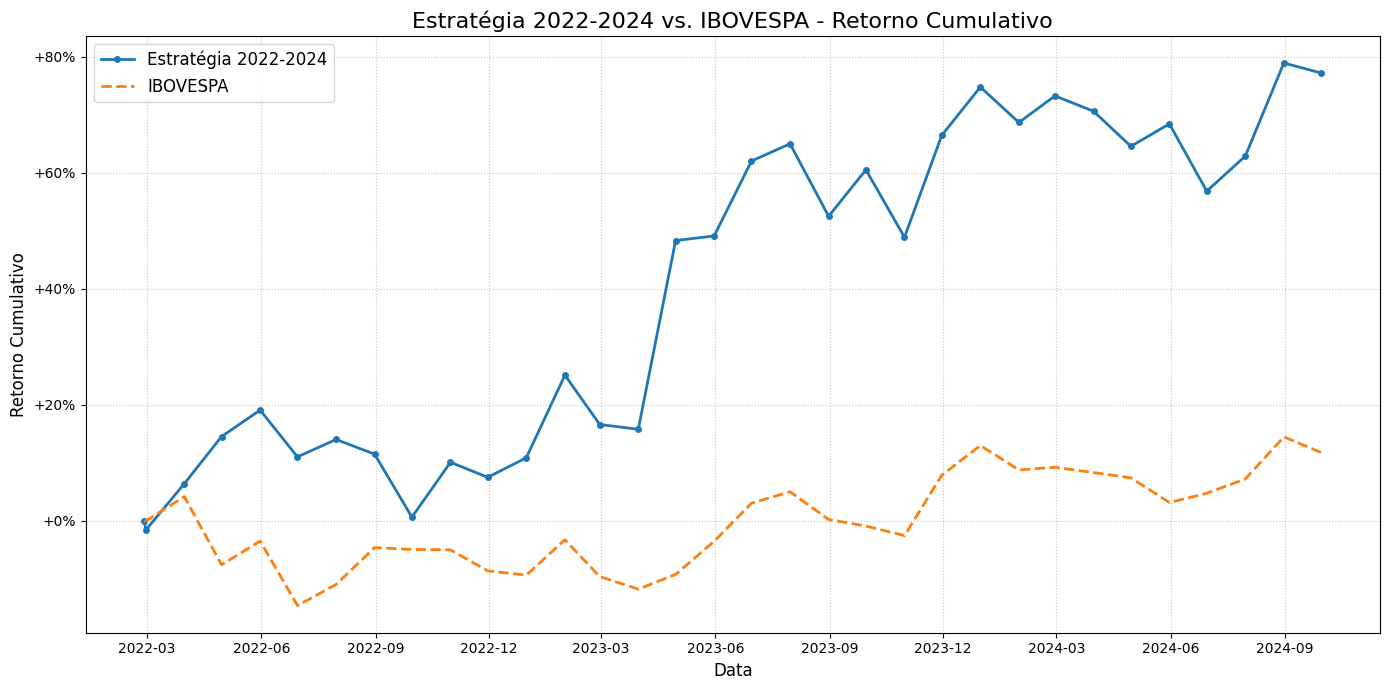

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

# Suprimir avisos de formatação futuros do pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Definição da Nova Carteira (2022-2024) ---
portfolios_2022_2024 = {
    '2022-02': ['SNSY5', 'MRFG3', 'MTSA4', 'ABEV3', 'RANI3'],
    '2022-03': ['SGPS3', 'CSAN3', 'ABEV3', 'RANI3', 'RAPT4'],
    '2022-04': ['AGRO3', 'KEPL3', 'TUPY3', 'MTSA4', 'SNSY5'],
    '2022-05': ['AGRO3', 'BEEF3', 'RANI3', 'SLCE3', 'ABEV3'],
    '2022-06': ['WLMM4', 'RANI3', 'PTNT4', 'BAUH4', 'CEDO4'],
    '2022-07': ['BEEF3', 'DXCO3', 'BRFS3', 'ABEV3', 'AGRO3'],
    '2022-08': ['SMTO3', 'CTSA4', 'RAPT4', 'CEDO4', 'KEPL3'],
    '2022-09': ['SMTO3', 'MRFG3', 'MDIA3', 'DOHL4', 'CEDO4'],
    '2022-10': ['KEPL3', 'SMTO3', 'AGRO3', 'TUPY3', 'SLCE3'],
    '2022-11': ['SMTO3', 'PTNT4', 'MRFG3', 'RANI3', 'BAUH4'],
    '2022-12': ['MRFG3', 'WLMM4', 'RANI3', 'EUCA4', 'TUPY3'],
    '2023-01': ['CTNM4', 'TUPY3', 'DOHL4', 'SGPS3', 'WLMM4'],
    '2023-02': ['DXCO3', 'FHER3', 'PCAR3', 'RANI3', 'BAUH4'],
    '2023-03': ['BRFS3', 'CEDO4', 'MRFG3', 'CTKA4', 'LUXM4'],
    '2023-04': ['MDIA3', 'CTNM4', 'SLCE3', 'RANI3', 'MTSA4'],
    '2023-05': ['RANI3', 'JOPA4', 'AGRO3', 'MTSA4', 'CSAN3'],
    '2023-06': ['CTNM4', 'BRFS3', 'FHER3', 'KEPL3', 'SLCE3'],
    '2023-07': ['AGRO3', 'DXCO3', 'ABEV3', 'BRFS3', 'KEPL3'],
    '2023-08': ['RANI3', 'AGRO3', 'FHER3', 'ABEV3', 'MTSA4'],
    '2023-09': ['AGRO3', 'RANI3', 'SLCE3', 'JOPA4', 'SNSY5'],
    '2023-10': ['CTSA4', 'CEDO4', 'MRFG3', 'RANI3', 'MSPA4'],
    '2023-11': ['RAPT4', 'ABEV3', 'CSAN3', 'AGRO3', 'CTSA4'],
    '2023-12': ['RAPT4', 'KEPL3', 'DOHL4', 'CTNM4', 'BAUH4'],
    '2024-01': ['EUCA4', 'SUZB3', 'MRFG3', 'CTSA4', 'CEDO4'],
    '2024-02': ['AGRO3', 'CGRA4', 'SNSY5', 'SMTO3', 'CSAN3'],
    '2024-03': ['SLCE3', 'FHER3', 'CSAN3', 'AGRO3', 'DXCO3'],
    '2024-04': ['DOHL4', 'TUPY3', 'MDIA3', 'CTKA4', 'BAUH4'],
    '2024-05': ['SNSY5', 'MRFG3', 'ABEV3', 'TXRX4', 'BEEF3'],
    '2024-06': ['MRFG3', 'CTSA4', 'DXCO3', 'PCAR3', 'SLCE3'],
    '2024-07': ['CEDO4', 'MTSA4', 'SGPS3', 'RANI3', 'TXRX4'],
    '2024-08': ['DXCO3', 'ABEV3', 'AGRO3', 'BRFS3', 'CSAN3'],
    '2024-09': ['CTSA4', 'CEDO4', 'DXCO3', 'SUZB3', 'JOPA4']
}


# --- 2. Função Auxiliar para Adicionar Sufixo '.SA' ---
# O Yahoo Finance exige '.SA' para tickers da B3
def add_sa_suffix_to_portfolios(portfolios):
    suffixed_portfolios = {}
    all_tickers = set()
    for month, tickers in portfolios.items():
        sa_tickers = [f"{ticker}.SA" for ticker in tickers]
        suffixed_portfolios[month] = sa_tickers
        all_tickers.update(sa_tickers)
    return suffixed_portfolios, all_tickers

# Adiciona '.SA' e coleta todos os tickers únicos
portfolios_sa, all_unique_tickers_list = add_sa_suffix_to_portfolios(portfolios_2022_2024)

# Adiciona o IBOVESPA (^BVSP) à lista de download
all_unique_tickers = list(all_unique_tickers_list.union({'^BVSP'}))

# --- 3. Download dos Dados Históricos ---
# Baixa todos os dados de uma vez para eficiência
# Começa em Jan/2022 (para ter o preço de abertura de Fev/2022)
# Termina em Out/2024 (para ter o preço de fechamento de Set/2024)
print("Baixando dados históricos (2022-2024)... Isso pode levar um momento.")
try:
    # Ajuste nas datas de início e fim
    data = yf.download(all_unique_tickers, start='2022-01-01', end='2024-10-01')
    adj_close_data = data['Close'].copy()
    print("Download de dados concluído.")
except Exception as e:
    print(f"Erro ao baixar os dados: {e}")
    adj_close_data = pd.DataFrame() # Cria um DataFrame vazio em caso de falha

# --- 4. Função Principal de Cálculo da Estratégia ---
def calculate_strategy_returns(portfolios_dict, adj_close_data, benchmark_ticker):
    if adj_close_data.empty:
        return pd.Series(name='Strategy'), pd.Series(name=benchmark_ticker)
        
    # Reamostra para pegar o preço do *primeiro* dia útil do mês (abertura)
    monthly_open_prices = adj_close_data.resample('MS').first().ffill()
    
    # Reamostra para pegar o preço do *último* dia útil do mês (fechamento)
    monthly_close_prices = adj_close_data.resample('M').last()

    portfolio_returns = {}
    benchmark_returns = {}
    
    sorted_months = sorted(portfolios_dict.keys())
    
    for month_str in sorted_months:
        month_start_dt = pd.to_datetime(month_str + '-01')
        
        try:
            # Pega a linha de preços de abertura do início do mês
            open_prices_row = monthly_open_prices.loc[month_start_dt]
            
            # Pega a linha de preços de fechamento do fim do mês
            close_prices_row = monthly_close_prices.loc[
                (monthly_close_prices.index.year == month_start_dt.year) &
                (monthly_close_prices.index.month == month_start_dt.month)
            ].iloc[0] # .iloc[0] para pegar a Series
            
            tickers = portfolios_dict[month_str]
            
            # --- Cálculo da Carteira (Peso Igual) ---
            start_prices = open_prices_row[tickers]
            end_prices = close_prices_row[tickers]
            
            # (Preço Final - Preço Inicial) / Preço Inicial
            returns_for_tickers = (end_prices - start_prices) / start_prices
            
            # Média dos retornos (ignorando NaNs se algum ticker não tiver dados)
            portfolio_month_return = returns_for_tickers.mean(skipna=True)

            # --- Cálculo do Benchmark (IBOV) ---
            bench_start = open_prices_row[benchmark_ticker]
            bench_end = close_prices_row[benchmark_ticker]
            
            if pd.isna(bench_start) or pd.isna(bench_end) or bench_start == 0:
                 bench_return = 0.0
            else:
                bench_return = (bench_end - bench_start) / bench_start
            
            # Armazena os resultados usando a data de fim de mês como índice
            portfolio_returns[close_prices_row.name] = portfolio_month_return
            benchmark_returns[close_prices_row.name] = bench_return

        except Exception as e:
            print(f"Aviso: Não foi possível processar {month_str}. Retorno de 0% atribuído. Erro: {e}")
            fallback_date = pd.to_datetime(month_str) + pd.offsets.MonthEnd(0)
            portfolio_returns[fallback_date] = 0.0
            benchmark_returns[fallback_date] = 0.0
    
    # Converte os dicionários em Séries do Pandas
    portfolio_series = pd.Series(portfolio_returns).sort_index()
    benchmark_series = pd.Series(benchmark_returns).sort_index()
    
    # --- Cria Retornos Cumulativos ---
    
    # Adiciona um "dia 0" com 0% de retorno para que o .cumprod() comece em 1
    start_date_port = portfolio_series.index.min() - pd.DateOffset(days=1)
    portfolio_series.loc[start_date_port] = 0.0
    portfolio_series = portfolio_series.sort_index()

    start_date_bench = benchmark_series.index.min() - pd.DateOffset(days=1)
    benchmark_series.loc[start_date_bench] = 0.0
    benchmark_series = benchmark_series.sort_index()

    # (1 + R1) * (1 + R2) * ...
    portfolio_cumulative = (1 + portfolio_series).cumprod()
    benchmark_cumulative = (1 + benchmark_series).cumprod()

    # Renomeia para a legenda do gráfico
    portfolio_cumulative.name = 'Strategy'
    benchmark_cumulative.name = benchmark_ticker

    return portfolio_cumulative, benchmark_cumulative

# --- 5. Cálculos e Plot ---

# Garante que temos dados antes de tentar calcular
if not adj_close_data.empty:
    
    # --- Cálculo para 2022-2024 ---
    port_cum, bench_cum = calculate_strategy_returns(portfolios_sa, adj_close_data, '^BVSP')

    # --- Plot 1: 2022-2024 Strategy ---
    plt.figure(figsize=(14, 7))
    if not port_cum.empty:
        plt.plot(port_cum.index, port_cum, label='Estratégia 2022-2024', linewidth=2, marker='o', markersize=4)
        plt.plot(bench_cum.index, bench_cum, label='IBOVESPA', linestyle='--', linewidth=2)
        
        # Formata o eixo Y como porcentagem (ex: +50%, -10%)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y-1)*100:+.0f}%'))
        
        # Formata o eixo X para mostrar datas
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Intervalo de 3 meses
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        
        plt.title('Estratégia 2022-2024 vs. IBOVESPA - Retorno Cumulativo', fontsize=16)
        plt.ylabel('Retorno Cumulativo', fontsize=12)
        plt.xlabel('Data', fontsize=12)
        plt.legend(fontsize=12, loc='upper left')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig('2022_2024_strategy_vs_ibov.png')
        print("Gráfico '2022_2024_strategy_vs_ibov.png' salvo.")
    else:
        print("Nenhum dado para plotar para 2022-2024.")

else:
    print("O download dos dados falhou. Nenhum gráfico foi gerado.")

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings

# Suprimir avisos de formatação futuros do pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 1. Definição das Carteiras ---
# (Seus dados foram colados aqui)
portfolios_2023 = {
    '2023-01': ['CTNM4', 'TUPY3', 'DOHL4', 'SGPS3', 'WLMM4'],
    '2023-02': ['DXCO3', 'FHER3', 'PCAR3', 'RANI3', 'BAUH4'],
    '2023-03': ['BRFS3', 'CEDO4', 'MRFG3', 'CTKA4', 'LUXM4'],
    '2023-04': ['MDIA3', 'CTNM4', 'SLCE3', 'RANI3', 'MTSA4'],
    '2023-05': ['RANI3', 'JOPA4', 'AGRO3', 'MTSA4', 'CSAN3'],
    '2023-06': ['CTNM4', 'BRFS3', 'FHER3', 'KEPL3', 'SLCE3'],
    '2023-07': ['AGRO3', 'DXCO3', 'ABEV3', 'BRFS3', 'KEPL3'],
    '2023-08': ['RANI3', 'AGRO3', 'FHER3', 'ABEV3', 'MTSA4'],
    '2023-09': ['AGRO3', 'RANI3', 'SLCE3', 'JOPA4', 'SNSY5'],
    '2023-10': ['CTSA4', 'CEDO4', 'MRFG3'],
    '2023-11': ['RAPT4', 'ABEV3', 'CSAN3', 'AGRO3', 'CTSA4'],
    '2023-12': ['RAPT4', 'KEPL3', 'DOHL4', 'CTNM4', 'BAUH4'],
    '2024-01': ['EUCA4', 'SUZB3', 'MRFG3', 'CTSA4', 'CEDO4']
}

portfolios_2015 = {
    '2015-01': ['CEDO4', 'MDIA3', 'EUCA4', 'CGRA4'],
    '2015-02': ['SNSY5', 'EUCA4', 'RAPT4', 'LUXM4', 'BEEF3'],
    '2015-03': ['SLCE3', 'RAPT4', 'SNSY5', 'RANI3', 'EUCA4'],
    '2015-04': ['SLCE3', 'WLMM4', 'DXCO3', 'CTKA4', 'MTSA4'],
    '2015-05': ['KEPL3', 'FHER3', 'TUPY3', 'MRFG3', 'CTNM4'],
    '2015-06': ['SLCE3', 'MRFG3', 'BRFS3', 'SNSY5', 'BEEF3'],
    '2015-07': ['CTSA4', 'MDIA3', 'LUXM4', 'DXCO3', 'PTNT4'],
    '2015-08': ['MSPA4', 'MRFG3', 'BRFS3'],
    '2015-09': ['SNSY5', 'DOHL4', 'CSAN3', 'CGRA4', 'ABEV3'],
    '2015-10': ['DXCO3', 'RANI3', 'SLCE3', 'SMTO3', 'JOPA4'],
    '2015-11': ['JOPA4', 'RANI3', 'RAPT4', 'SNSY5', 'KEPL3'],
    '2015-12': ['BRFS3', 'WLMM4', 'SNSY5', 'BEEF3', 'CTKA4']
}

# --- 2. Função Auxiliar para Adicionar Sufixo '.SA' ---
# O Yahoo Finance exige '.SA' para tickers da B3
def add_sa_suffix_to_portfolios(portfolios):
    suffixed_portfolios = {}
    all_tickers = set()
    for month, tickers in portfolios.items():
        sa_tickers = [f"{ticker}.SA" for ticker in tickers]
        suffixed_portfolios[month] = sa_tickers
        all_tickers.update(sa_tickers)
    return suffixed_portfolios, all_tickers

# Adiciona '.SA' e coleta todos os tickers únicos
portfolios_2023_sa, tickers_2023 = add_sa_suffix_to_portfolios(portfolios_2023)
portfolios_2015_sa, tickers_2015 = add_sa_suffix_to_portfolios(portfolios_2015)

# Combina todos os tickers para um único download
all_unique_tickers = list(tickers_2023.union(tickers_2015).union({'^BVSP'})) # Usando ^BVSP para o IBOV

# --- 3. Download dos Dados Históricos ---
# Baixa todos os dados de uma vez para eficiência
# Começa em Dez/2014 (para ter o preço de abertura de Jan/2015)
# Termina em Fev/2024 (para ter o preço de fechamento de Jan/2024)
print("Baixando dados históricos... Isso pode levar um momento.")
try:
    data = yf.download(all_unique_tickers, start='2014-12-01', end='2024-02-29')
    adj_close_data = data['Close'].copy()
    print("Download de dados concluído.")
except Exception as e:
    print(f"Erro ao baixar os dados: {e}")
    adj_close_data = pd.DataFrame() # Cria um DataFrame vazio em caso de falha

# --- 4. Função Principal de Cálculo da Estratégia ---
def calculate_strategy_returns(portfolios_dict, adj_close_data, benchmark_ticker):
    if adj_close_data.empty:
        return pd.Series(name='Strategy'), pd.Series(name=benchmark_ticker)
        
    # Reamostra para pegar o preço do *primeiro* dia útil do mês (abertura)
    # Usamos 'MS' (Month Start) e .first(). ffill() preenche feriados com o fechamento anterior
    monthly_open_prices = adj_close_data.resample('MS').first().ffill()
    
    # Reamostra para pegar o preço do *último* dia útil do mês (fechamento)
    monthly_close_prices = adj_close_data.resample('M').last()

    portfolio_returns = {}
    benchmark_returns = {}
    
    sorted_months = sorted(portfolios_dict.keys())
    
    for month_str in sorted_months:
        month_start_dt = pd.to_datetime(month_str + '-01')
        
        try:
            # Pega a linha de preços de abertura do início do mês
            open_prices_row = monthly_open_prices.loc[month_start_dt]
            
            # Pega a linha de preços de fechamento do fim do mês
            close_prices_row = monthly_close_prices.loc[
                (monthly_close_prices.index.year == month_start_dt.year) &
                (monthly_close_prices.index.month == month_start_dt.month)
            ].iloc[0] # .iloc[0] para pegar a Series
            
            tickers = portfolios_dict[month_str]
            
            # --- Cálculo da Carteira (Peso Igual) ---
            start_prices = open_prices_row[tickers]
            end_prices = close_prices_row[tickers]
            
            # (Preço Final - Preço Inicial) / Preço Inicial
            returns_for_tickers = (end_prices - start_prices) / start_prices
            
            # Média dos retornos (ignorando NaNs se algum ticker não tiver dados)
            portfolio_month_return = returns_for_tickers.mean(skipna=True)

            # --- Cálculo do Benchmark (IBOV) ---
            bench_start = open_prices_row[benchmark_ticker]
            bench_end = close_prices_row[benchmark_ticker]
            
            if pd.isna(bench_start) or pd.isna(bench_end) or bench_start == 0:
                 bench_return = 0.0
            else:
                bench_return = (bench_end - bench_start) / bench_start
            
            # Armazena os resultados usando a data de fim de mês como índice
            portfolio_returns[close_prices_row.name] = portfolio_month_return
            benchmark_returns[close_prices_row.name] = bench_return

        except Exception as e:
            print(f"Aviso: Não foi possível processar {month_str}. Retorno de 0% atribuído. Erro: {e}")
            fallback_date = pd.to_datetime(month_str) + pd.offsets.MonthEnd(0)
            portfolio_returns[fallback_date] = 0.0
            benchmark_returns[fallback_date] = 0.0
    
    # Converte os dicionários em Séries do Pandas
    portfolio_series = pd.Series(portfolio_returns).sort_index()
    benchmark_series = pd.Series(benchmark_returns).sort_index()
    
    # --- Cria Retornos Cumulativos ---
    
    # Adiciona um "dia 0" com 0% de retorno para que o .cumprod() comece em 1
    start_date_port = portfolio_series.index.min() - pd.DateOffset(days=1)
    portfolio_series.loc[start_date_port] = 0.0
    portfolio_series = portfolio_series.sort_index()

    start_date_bench = benchmark_series.index.min() - pd.DateOffset(days=1)
    benchmark_series.loc[start_date_bench] = 0.0
    benchmark_series = benchmark_series.sort_index()

    # (1 + R1) * (1 + R2) * ...
    portfolio_cumulative = (1 + portfolio_series).cumprod()
    benchmark_cumulative = (1 + benchmark_series).cumprod()

    # Renomeia para a legenda do gráfico
    portfolio_cumulative.name = 'Strategy'
    benchmark_cumulative.name = benchmark_ticker

    return portfolio_cumulative, benchmark_cumulative

# --- 5. Cálculos e Plots ---

# Garante que temos dados antes de tentar calcular
if not adj_close_data.empty:
    
    # --- Cálculo para 2015 ---
    port_2015, bench_2015 = calculate_strategy_returns(portfolios_2015_sa, adj_close_data, '^BVSP')

    # --- Cálculo para 2023-2024 ---
    port_2023, bench_2023 = calculate_strategy_returns(portfolios_2023_sa, adj_close_data, '^BVSP')

    # --- Plot 1: 2015 Strategy ---
    plt.figure(figsize=(14, 7))
    if not port_2015.empty:
        plt.plot(port_2015.index, port_2015, label='Estratégia 2015', linewidth=2, marker='o', markersize=4)
        plt.plot(bench_2015.index, bench_2015, label='IBOVESPA', linestyle='--', linewidth=2)
        
        # Formata o eixo Y como porcentagem (ex: +50%, -10%)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y-1)*100:+.0f}%'))
        
        # Formata o eixo X para mostrar datas
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        
        plt.title('Estratégia 2015 vs. IBOVESPA - Retorno Cumulativo', fontsize=16)
        plt.ylabel('Retorno Cumulativo', fontsize=12)
        plt.xlabel('Data', fontsize=12)
        plt.legend(fontsize=12, loc='upper left')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig('2015_strategy_vs_ibov.png')
        print("Gráfico '2015_strategy_vs_ibov.png' salvo.")
    else:
        print("Nenhum dado para plotar para 2015.")

    # --- Plot 2: 2023-2024 Strategy ---
    plt.figure(figsize=(14, 7))
    if not port_2023.empty:
        plt.plot(port_2023.index, port_2023, label='Estratégia 2023-2024', linewidth=2, marker='o', markersize=4)
        plt.plot(bench_2023.index, bench_2023, label='IBOVESPA', linestyle='--', linewidth=2)

        # Formata o eixo Y como porcentagem
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y-1)*100:+.0f}%'))

        # Formata o eixo X
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        
        plt.title('Estratégia 2023-2024 vs. IBOVESPA - Retorno Cumulativo', fontsize=16)
        plt.ylabel('Retorno Cumulativo', fontsize=12)
        plt.xlabel('Data', fontsize=12)
        plt.legend(fontsize=12, loc='upper left')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig('2023_2024_strategy_vs_ibov.png')
        print("Gráfico '2023_2024_strategy_vs_ibov.png' salvo.")
    else:
        print("Nenhum dado para plotar para 2023-2024.")

else:
    print("O download dos dados falhou. Nenhum gráfico foi gerado.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

print("\n" + "="*80)
print("BACKTEST FOR FOLD 5 (TEST SET ONLY) - OUT-OF-SAMPLE VALIDATION")
print("="*80)

# Select stocks to analyze
stocks_to_analyze = ['CTNM4', 'SMTO3', 'MDIA3', 'DXCO3', 'BEEF3']

# Prepare IBOV returns
data = pd.read_excel("dados_ceres.xlsx")
df_original = pd.DataFrame(data)

# Extract IBOV returns
ibov_returns = df_original[['IBOV (%)']].copy()
if 'date' in df_original.columns:
    ibov_returns.index = pd.to_datetime(df_original['date'], format='%m/%Y', errors='coerce')
else:
    ibov_returns.index = pd.to_datetime(df_original.index, format='%m/%Y', errors='coerce')

# FIX: Remove .dt accessor - PeriodIndex doesn't need it
ibov_returns.index = ibov_returns.index.to_period('M').to_timestamp()

ibov_returns['IBOV (%)'] = pd.to_numeric(
    ibov_returns['IBOV (%)'].astype(str).str.rstrip('%').str.replace(',', '.'), 
    errors='coerce'
)
ibov_returns = ibov_returns.dropna()

print(f"✓ Loaded IBOV data: {len(ibov_returns)} months")

# Collect predictions from FOLD 5 ONLY for each stock
fold_5_results = {}

for stock in stocks_to_analyze:
    folds_var_name = f'folds_{stock}'
    
    if folds_var_name not in globals():
        print(f"  ⚠ Skipping {stock}: Fold data not found")
        continue
    
    folds = globals()[folds_var_name]
    
    # Get fold 5 (index 4, since 0-indexed)
    fold_5 = folds[4]
    
    # Extract test data for fold 5
    X_test_fold5 = fold_5['X_test']
    test_dates_fold5 = fold_5['test_dates']
    
    # Calculate the starting index for fold 5
    fold_5_start_idx = sum([len(folds[i]['test_indices']) for i in range(4)])
    fold_5_end_idx = fold_5_start_idx + len(fold_5['test_indices'])
    
    all_predictions = stock_results[stock]['all_predictions']
    all_y_true = stock_results[stock]['all_y_true']
    all_buy_probs = stock_results[stock]['buy_probabilities']
    
    # Extract fold 5 predictions
    fold_5_predictions = all_predictions[fold_5_start_idx:fold_5_end_idx]
    fold_5_y_true = all_y_true[fold_5_start_idx:fold_5_end_idx]
    fold_5_buy_probs = all_buy_probs[fold_5_start_idx:fold_5_end_idx]
    
    # FIX: Normalize dates correctly
    dates_normalized = pd.to_datetime(test_dates_fold5).to_period('M').to_timestamp()
    
    # Create DataFrame
    results_df = pd.DataFrame({
        'date': dates_normalized,
        'prediction': fold_5_predictions,
        'actual_class': fold_5_y_true,
        'buy_probability': fold_5_buy_probs
    })
    
    # Join with IBOV
    results_df = results_df.set_index('date').join(
        ibov_returns['IBOV (%)'].rename('ibov_return'), 
        how='left'
    ).reset_index()
    
    results_df = results_df.dropna(subset=['ibov_return'])
    
    fold_5_results[stock] = results_df
    
    print(f"  ✓ {stock}: {len(results_df)} test samples from Fold 5")

# Calculate strategy performance for Fold 5
def calculate_fold5_strategy(results_df):
    """Calculate returns for Fold 5 test set"""
    # Trading signals: 2=LONG(+IBOV), 0=SHORT(-IBOV), 1=CASH(0)
    signals = np.where(results_df['prediction'] == 2, 1,
              np.where(results_df['prediction'] == 0, -1, 0))
    
    strategy_returns = signals * results_df['ibov_return'].values
    
    # FIX: Convert to pandas Series before using cumprod
    cumulative_strategy = pd.Series(1 + strategy_returns / 100).cumprod()
    cumulative_ibov = pd.Series(1 + results_df['ibov_return'].values / 100).cumprod()
    
    return {
        'dates': results_df['date'],
        'cumulative_strategy': cumulative_strategy,
        'cumulative_ibov': cumulative_ibov,
        'strategy_returns': strategy_returns,
        'total_return': (cumulative_strategy.iloc[-1] - 1) * 100,
        'ibov_return': (cumulative_ibov.iloc[-1] - 1) * 100
    }


# Calculate for each stock
stock_performances = {}
for stock, df in fold_5_results.items():
    stock_performances[stock] = calculate_fold5_strategy(df)
    perf = stock_performances[stock]
    alpha = perf['total_return'] - perf['ibov_return']
    print(f"\n{stock} (Fold 5 Test):")
    print(f"  Strategy Return: {perf['total_return']:.2f}%")
    print(f"  IBOV Return: {perf['ibov_return']:.2f}%")
    print(f"  Alpha: {alpha:+.2f}%")

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Fold 5 Test Set Backtest (Out-of-Sample)', fontsize=16, fontweight='bold')

for idx, stock in enumerate(stocks_to_analyze):
    if stock not in stock_performances:
        continue
    
    ax = axes[idx // 3, idx % 3]
    perf = stock_performances[stock]
    
    ax.plot(perf['dates'], perf['cumulative_strategy'], 
            label='Strategy', linewidth=2.5, color='#FF6B35')
    ax.plot(perf['dates'], perf['cumulative_ibov'], 
            label='IBOV', linewidth=2.5, color='black', linestyle='--', alpha=0.7)
    
    ax.set_title(f'{stock}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cumulative Return')
    ax.legend()
    ax.grid(alpha=0.3)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    # Add performance text
    alpha = perf['total_return'] - perf['ibov_return']
    textstr = f"Strat: {perf['total_return']:.1f}%\nIBOV: {perf['ibov_return']:.1f}%\nAlpha: {alpha:+.1f}%"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('fold5_test_backtest.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
print("✓ Fold 5 backtest complete - fully out-of-sample, no overfitting")
print("="*80)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("COMPLETE BACKTEST IMPLEMENTATION - CERES STRATEGY vs IBOV")
print("="*80)

# =============================================================================
# STEP 1: LOAD DATA AND PREPARE IBOV RETURNS
# =============================================================================

def prepare_actual_ibov_returns(df_original, ibov_column='IBOV (%)', date_col='date'):
    """Extract and clean IBOV returns with robust date parsing"""
    if ibov_column not in df_original.columns:
        raise KeyError(f"Column '{ibov_column}' not found. Available: {df_original.columns.tolist()}")

    ibov = df_original[[ibov_column]].copy()

    # Parse dates robustly
    if isinstance(df_original.index, pd.DatetimeIndex):
        dates = df_original.index.to_series()
    else:
        if date_col in df_original.columns:
            dates = pd.to_datetime(df_original[date_col], errors='coerce', dayfirst=False)
        else:
            dates = pd.to_datetime(df_original.index, errors='coerce', dayfirst=False)

    # Normalize to month-start
    ibov = ibov.assign(_date=dates).dropna(subset=['_date'])
    ibov['_date'] = ibov['_date'].dt.to_period('M').dt.to_timestamp()
    ibov = ibov.set_index('_date')

    # Clean numeric values (handle '%', commas)
    s = ibov[ibov_column].astype(str).str.strip()
    s = s.str.replace('%', '', regex=False)
    s = s.str.replace(',', '.', regex=False)
    ibov[ibov_column] = pd.to_numeric(s, errors='coerce')

    ibov = ibov.dropna(subset=[ibov_column]).sort_index()

    print(f"✓ Loaded {len(ibov)} months of IBOV data")
    print(f"  Date range: {ibov.index.min().date()} to {ibov.index.max().date()}")
    print(f"  Mean monthly return: {ibov[ibov_column].mean():.2f}%")
    
    return ibov[ibov_column]


# =============================================================================
# STEP 2: ALIGN PREDICTIONS WITH IBOV
# =============================================================================

def align_predictions_with_ibov(stock_name, stock_results, ibov_returns, folds_by_stock=None):
    """Align model predictions with actual IBOV returns"""
    
    # Collect test dates from folds
    if folds_by_stock and stock_name in folds_by_stock:
        all_dates_raw = []
        for fold in folds_by_stock[stock_name]:
            all_dates_raw.extend(list(fold.get('test_dates', [])))
    elif 'test_dates' in stock_results:
        all_dates_raw = list(stock_results['test_dates'])
    else:
        print(f"  ⚠ Warning: No test_dates found for {stock_name}")
        return None

    preds = np.array(stock_results.get('all_predictions', []))
    y_true = np.array(stock_results.get('all_y_true', []))

    # Align lengths
    n = min(len(all_dates_raw), len(preds), len(y_true))
    if n == 0:
        return None

    # Normalize dates to month-start
    all_dates = pd.to_datetime(pd.Series(all_dates_raw[:n]), errors='coerce')
    all_dates = all_dates.dt.to_period('M').dt.to_timestamp()
    
    results_df = pd.DataFrame({
        'date': all_dates,
        'prediction': preds[:n],
        'actual_class': y_true[:n]
    }).dropna(subset=['date'])

    # Join with IBOV
    results_df = results_df.set_index('date', drop=False).join(
        ibov_returns.rename('ibov_return'), how='left'
    )
    
    missing = results_df['ibov_return'].isna().sum()
    if missing > 0:
        print(f"  ⚠ {stock_name}: {missing} dates missing IBOV data")
    
    return results_df.dropna(subset=['ibov_return'])


# =============================================================================
# STEP 3: CALCULATE STRATEGY PERFORMANCE
# =============================================================================

def calculate_strategy_performance(predictions_df):
    """
    Calculate strategy returns:
    - Prediction 2 (BUY): LONG (+IBOV return)
    - Prediction 0 (SELL): SHORT (-IBOV return)  
    - Prediction 1 (HOLD): CASH (0% return)
    """
    if predictions_df is None or predictions_df.empty:
        return None

    # Generate signals
    signals = np.where(predictions_df['prediction'] == 2, 1,      # LONG
              np.where(predictions_df['prediction'] == 0, -1,     # SHORT
                      0))                                          # CASH

    # Strategy returns = signal * IBOV return
    strategy_returns = signals * predictions_df['ibov_return'].values

    # Cumulative returns
    cum_strategy = (1 + pd.Series(strategy_returns) / 100).cumprod()
    cum_ibov = (1 + predictions_df['ibov_return'] / 100).cumprod()

    # Trade statistics
    total_trades = int((signals != 0).sum())
    long_trades = int((signals == 1).sum())
    short_trades = int((signals == -1).sum())
    hold_periods = int((signals == 0).sum())
    
    winning_trades = int((strategy_returns > 0).sum())
    losing_trades = int((strategy_returns < 0).sum())
    win_rate = winning_trades / total_trades if total_trades > 0 else 0.0

    # Returns
    total_strategy_return = float(cum_strategy.iloc[-1] - 1.0)
    total_ibov_return = float(cum_ibov.iloc[-1] - 1.0)
    alpha = total_strategy_return - total_ibov_return

    # Risk metrics
    strategy_vol = float(pd.Series(strategy_returns).std())
    ibov_vol = float(predictions_df['ibov_return'].std())
    
    sharpe_strategy = (pd.Series(strategy_returns).mean() / strategy_vol) if strategy_vol > 0 else 0.0
    sharpe_ibov = (predictions_df['ibov_return'].mean() / ibov_vol) if ibov_vol > 0 else 0.0

    # Max drawdown
    running_max = cum_strategy.cummax()
    drawdown = (cum_strategy - running_max) / running_max
    max_drawdown = float(drawdown.min())

    return {
        'total_months': len(predictions_df),
        'total_trades': total_trades,
        'long_trades': long_trades,
        'short_trades': short_trades,
        'hold_periods': hold_periods,
        'winning_trades': winning_trades,
        'losing_trades': losing_trades,
        'win_rate': float(win_rate),
        'total_return_pct': float(total_strategy_return * 100),
        'ibov_return_pct': float(total_ibov_return * 100),
        'alpha_pct': float(alpha * 100),
        'annualized_return': float(((1 + total_strategy_return) ** (12/len(predictions_df)) - 1) * 100),
        'volatility': strategy_vol,
        'sharpe_ratio': float(sharpe_strategy),
        'sharpe_ibov': float(sharpe_ibov),
        'max_drawdown_pct': float(max_drawdown * 100),
        'cumulative_strategy': cum_strategy,
        'cumulative_ibov': cum_ibov,
        'strategy_returns': pd.Series(strategy_returns),
        'dates': predictions_df['date'].values
    }


# =============================================================================
# STEP 4: RUN COMPLETE BACKTEST
# =============================================================================

def run_complete_backtest(stock_results, df_original, ibov_column='IBOV (%)', folds_by_stock=None):
    """Run backtest for all stocks against IBOV"""
    
    print("\n[1/3] Loading IBOV returns...")
    ibov_returns = prepare_actual_ibov_returns(df_original, ibov_column)

    print("\n[2/3] Running backtest for all stocks...")
    backtest_results = {}

    for idx, stock_name in enumerate(stock_results.keys(), 1):
        pred_df = align_predictions_with_ibov(
            stock_name, 
            stock_results[stock_name], 
            ibov_returns,
            folds_by_stock=folds_by_stock
        )
        
        if pred_df is None or pred_df.empty:
            print(f"  ⚠ Skipping {stock_name}: No aligned data")
            continue

        perf = calculate_strategy_performance(pred_df)
        
        if perf is None:
            continue

        perf['stock'] = stock_name
        perf['model_f1'] = float(stock_results[stock_name].get('f1_score', np.nan))
        backtest_results[stock_name] = perf

        if idx % 10 == 0:
            print(f"  Processed {idx}/{len(stock_results)} stocks...")

    print(f"\n✓ Backtest complete for {len(backtest_results)} stocks")

    # Calculate IBOV benchmark
    print("\n[3/3] Calculating IBOV benchmark...")
    ibov_cum = (1 + ibov_returns / 100).cumprod()
    ibov_total_ret = float((ibov_cum.iloc[-1] - 1) * 100)
    ibov_vol = float(ibov_returns.std())
    ibov_sharpe = float((ibov_returns.mean() / ibov_vol) if ibov_vol > 0 else 0.0)

    ibov_benchmark = {
        'total_return_pct': ibov_total_ret,
        'annualized_return': float(((1 + ibov_total_ret/100) ** (12/len(ibov_returns)) - 1) * 100),
        'volatility': ibov_vol,
        'sharpe_ratio': ibov_sharpe,
        'positive_months': int((ibov_returns > 0).sum()),
        'negative_months': int((ibov_returns < 0).sum())
    }

    return backtest_results, ibov_benchmark


# =============================================================================
# STEP 5: ANALYZE RESULTS
# =============================================================================

def analyze_backtest_results(backtest_results, ibov_benchmark):
    """Print comprehensive backtest analysis"""
    
    print("\n" + "="*80)
    print("BACKTEST RESULTS - CERES STRATEGY vs IBOV")
    print("="*80)

    # IBOV Benchmark
    print("\n" + "="*80)
    print("IBOV BENCHMARK (BUY & HOLD)")
    print("="*80)
    print(f"Total Return: {ibov_benchmark['total_return_pct']:.2f}%")
    print(f"Annualized Return: {ibov_benchmark['annualized_return']:.2f}%")
    print(f"Volatility: {ibov_benchmark['volatility']:.2f}%")
    print(f"Sharpe Ratio: {ibov_benchmark['sharpe_ratio']:.3f}")

    # Sort by alpha
    sorted_by_alpha = sorted(backtest_results.items(), 
                            key=lambda x: x[1]['alpha_pct'], 
                            reverse=True)

    # Top 10
    print("\n" + "="*80)
    print("TOP 10 STRATEGIES BY ALPHA")
    print("="*80)
    
    for rank, (stock, metrics) in enumerate(sorted_by_alpha[:10], 1):
        print(f"\n#{rank}. {stock}")
        print(f"  Alpha: {metrics['alpha_pct']:+.2f}%")
        print(f"  Total Return: {metrics['total_return_pct']:.2f}% (IBOV: {metrics['ibov_return_pct']:.2f}%)")
        print(f"  Sharpe: {metrics['sharpe_ratio']:.3f}")
        print(f"  Win Rate: {metrics['win_rate']:.1%} ({metrics['winning_trades']}/{metrics['total_trades']} trades)")
        print(f"  Max DD: {metrics['max_drawdown_pct']:.2f}%")

    # Summary
    all_alphas = [m['alpha_pct'] for m in backtest_results.values()]
    positive_alpha = sum(1 for a in all_alphas if a > 0)

    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    print(f"Total Stocks: {len(backtest_results)}")
    print(f"Positive Alpha: {positive_alpha}/{len(backtest_results)} ({positive_alpha/len(backtest_results):.1%})")
    print(f"Mean Alpha: {np.mean(all_alphas):+.2f}%")
    print(f"Median Alpha: {np.median(all_alphas):+.2f}%")

    return sorted_by_alpha


# =============================================================================
# EXECUTE BACKTEST
# =============================================================================

print("\n" + "="*80)
print("EXECUTING COMPLETE BACKTEST")
print("="*80)

# Load data
print("\nLoading data...")
data = pd.read_excel("dados_ceres.xlsx")
df_original = pd.DataFrame(data)

if 'IBOV (%)' not in df_original.columns:
    print("\n❌ ERROR: 'IBOV (%)' column not found!")
    print(f"Available columns: {df_original.columns.tolist()}")
else:
    print(f"✓ Found IBOV (%) column")
    print(f"  DataFrame shape: {df_original.shape}")
    
    # Collect folds for all stocks
    folds_by_stock = {}
    for stock in stock_results.keys():
        folds_var_name = f'folds_{stock}'
        if folds_var_name in globals():
            folds_by_stock[stock] = globals()[folds_var_name]
    
    print(f"✓ Collected folds for {len(folds_by_stock)} stocks")
    
    # Run backtest
    backtest_results, ibov_benchmark = run_complete_backtest(
        stock_results,
        df_original,
        ibov_column='IBOV (%)',
        folds_by_stock=folds_by_stock
    )
    
    # Analyze results
    sorted_strategies = analyze_backtest_results(backtest_results, ibov_benchmark)
    
    print("\n" + "="*80)
    print("✓ BACKTEST COMPLETE")
    print("="*80)
    print("\nResults stored in:")
    print("  - backtest_results: Dict with per-stock performance")
    print("  - ibov_benchmark: IBOV buy & hold metrics")
    print("  - sorted_strategies: List sorted by alpha")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

print("\n" + "="*80)
print("MONTHLY TOP 5 PORTFOLIO STRATEGY - BACKTEST")
print("="*80)

# =============================================================================
# STEP 1: BUILD MONTHLY TOP 5 SELECTIONS BASED ON BUY PROBABILITIES
# =============================================================================

print("\n[1/5] Building monthly Top 5 selections...")

monthly_top5 = {}

for stock, metrics in backtest_results.items():
    dates = pd.to_datetime(metrics['dates'])
    buy_probs = np.array(metrics['buy_probabilities'])
    
    # Group by month and find top probabilities
    for date, prob in zip(dates, buy_probs):
        month_key = date.strftime('%Y-%m')
        
        if month_key not in monthly_top5:
            monthly_top5[month_key] = []
        
        monthly_top5[month_key].append({
            'stock': stock,
            'buy_probability': float(prob),
            'date': date
        })

# Select Top 5 per month
for month in monthly_top5:
    # Sort by buy_probability descending and take top 5
    monthly_top5[month] = sorted(monthly_top5[month], 
                                  key=lambda x: x['buy_probability'], 
                                  reverse=True)[:5]
    
    stocks = [s['stock'] for s in monthly_top5[month]]
    avg_prob = np.mean([s['buy_probability'] for s in monthly_top5[month]])
    
    print(f"{month}: {stocks} (avg prob: {avg_prob:.3f})")

print(f"\n✓ Generated Top 5 selections for {len(monthly_top5)} months")

# =============================================================================
# STEP 2: DOWNLOAD ACTUAL STOCK RETURNS FROM YAHOO FINANCE
# =============================================================================

print("\n[2/5] Downloading actual stock returns from Yahoo Finance...")

# Get all unique stocks and date range
all_stocks = set()
for selections in monthly_top5.values():
    all_stocks.update([s['stock'] for s in selections])

min_date = min([s['date'] for selections in monthly_top5.values() for s in selections])
max_date = max([s['date'] for selections in monthly_top5.values() for s in selections])

# Add .SA suffix for B3 stocks
tickers_yf = {stock: f"{stock}.SA" for stock in all_stocks}

print(f"  Stocks to download: {len(all_stocks)}")
print(f"  Date range: {min_date.date()} to {max_date.date()}")

# Download with progress
stock_returns_yf = {}

for stock, ticker in tickers_yf.items():
    try:
        df = yf.download(ticker, 
                         start=min_date - pd.DateOffset(months=1), 
                         end=max_date + pd.DateOffset(months=1),
                         progress=False)
        
        if df.empty:
            print(f"  ⚠ No data for {stock}")
            continue
        
        # Calculate monthly returns
        monthly = df['Adj Close'].resample('M').last()
        returns = monthly.pct_change() * 100  # percentage
        
        stock_returns_yf[stock] = returns
        
    except Exception as e:
        print(f"  ⚠ Error downloading {stock}: {e}")

print(f"✓ Successfully downloaded {len(stock_returns_yf)}/{len(all_stocks)} stocks")

# =============================================================================
# STEP 3: DOWNLOAD IBOV RETURNS
# =============================================================================

print("\n[3/5] Downloading IBOV returns...")

ibov = yf.download('^BVSP', 
                   start=min_date - pd.DateOffset(months=1), 
                   end=max_date + pd.DateOffset(months=1),
                   progress=False)

ibov_monthly = ibov['Adj Close'].resample('M').last()
ibov_returns = ibov_monthly.pct_change() * 100

print(f"✓ Downloaded IBOV data: {len(ibov_returns)} months")

# =============================================================================
# STEP 4: CALCULATE TOP 5 PORTFOLIO RETURNS
# =============================================================================

print("\n[4/5] Calculating Top 5 Portfolio returns...")

portfolio_returns = []
months_list = []

for month_key in sorted(monthly_top5.keys()):
    month_date = pd.Timestamp(month_key + '-01')
    top5_stocks = [s['stock'] for s in monthly_top5[month_key]]
    
    # Get returns for each stock in the portfolio
    month_stock_returns = []
    for stock in top5_stocks:
        if stock not in stock_returns_yf:
            continue
        
        returns_series = stock_returns_yf[stock]
        
        # Find the return for this month
        # Use month_date normalized to end of month
        month_end = month_date + pd.offsets.MonthEnd(0)
        
        # Try to match the date
        matching_returns = returns_series[returns_series.index.to_period('M') == month_date.to_period('M')]
        
        if not matching_returns.empty:
            ret = float(matching_returns.iloc[0])
            if pd.notna(ret):
                month_stock_returns.append(ret)
    
    # Calculate equal-weighted portfolio return
    if month_stock_returns:
        avg_return = float(np.mean(month_stock_returns))
        portfolio_returns.append(avg_return)
        months_list.append(month_date)
        print(f"  {month_key}: {len(month_stock_returns)}/5 stocks, Avg return = {avg_return:.2f}%")
    else:
        print(f"  {month_key}: No valid returns found")

# Create Series for comparison
top5_returns = pd.Series(portfolio_returns, index=pd.DatetimeIndex(months_list))

# Normalize both indices to month start
top5_returns.index = top5_returns.index.to_period('M').to_timestamp()
ibov_returns.index = ibov_returns.index.to_period('M').to_timestamp()

# Create comparison DataFrame
df_comparison = pd.DataFrame({
    'portfolio_return': top5_returns,
    'ibov_return': ibov_returns
}).dropna()

if df_comparison.empty:
    print("\n⚠ No overlapping data between portfolio and IBOV!")
else:
    print(f"\n✓ Calculated {len(df_comparison)} months of portfolio returns")

# =============================================================================
# STEP 5: CALCULATE CUMULATIVE RETURNS AND METRICS
# =============================================================================

print("\n[5/5] Calculating performance metrics...")

# Cumulative returns
df_comparison['portfolio_cumulative'] = (1 + df_comparison['portfolio_return'] / 100).cumprod()
df_comparison['ibov_cumulative'] = (1 + df_comparison['ibov_return'] / 100).cumprod()

# Metrics
total_port_return = (df_comparison['portfolio_cumulative'].iloc[-1] - 1) * 100
total_ibov_return = (df_comparison['ibov_cumulative'].iloc[-1] - 1) * 100
alpha = total_port_return - total_ibov_return

port_vol = df_comparison['portfolio_return'].std()
ibov_vol = df_comparison['ibov_return'].std()

port_sharpe = (df_comparison['portfolio_return'].mean() / port_vol) if port_vol > 0 else 0
ibov_sharpe = (df_comparison['ibov_return'].mean() / ibov_vol) if ibov_vol > 0 else 0

# Max drawdown
port_running_max = df_comparison['portfolio_cumulative'].cummax()
port_dd = (df_comparison['portfolio_cumulative'] - port_running_max) / port_running_max
port_max_dd = port_dd.min() * 100

# Win rate
winning_months = (df_comparison['portfolio_return'] > 0).sum()
win_rate = winning_months / len(df_comparison)

# =============================================================================
# STEP 6: PRINT RESULTS
# =============================================================================

print("\n" + "="*80)
print("TOP 5 MONTHLY PORTFOLIO - PERFORMANCE RESULTS")
print("="*80)

print(f"\nPortfolio Strategy:")
print(f"  Total Return: {total_port_return:.2f}%")
print(f"  Annualized Return: {((1 + total_port_return/100) ** (12/len(df_comparison)) - 1) * 100:.2f}%")
print(f"  Volatility: {port_vol:.2f}%")
print(f"  Sharpe Ratio: {port_sharpe:.3f}")
print(f"  Max Drawdown: {port_max_dd:.2f}%")
print(f"  Win Rate: {win_rate:.1%}")

print(f"\nIBOV Benchmark:")
print(f"  Total Return: {total_ibov_return:.2f}%")
print(f"  Annualized Return: {((1 + total_ibov_return/100) ** (12/len(df_comparison)) - 1) * 100:.2f}%")
print(f"  Volatility: {ibov_vol:.2f}%")
print(f"  Sharpe Ratio: {ibov_sharpe:.3f}")

print(f"\nAlpha: {alpha:+.2f}%")
print(f"Period: {df_comparison.index.min().strftime('%Y-%m')} to {df_comparison.index.max().strftime('%Y-%m')}")
print(f"Total Months: {len(df_comparison)}")

# =============================================================================
# STEP 7: PLOT RESULTS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Monthly Top 5 Portfolio Strategy vs IBOV', fontsize=16, fontweight='bold')

# 1. Cumulative returns
axes[0, 0].plot(df_comparison.index, df_comparison['portfolio_cumulative'], 
                label='Top 5 Portfolio', linewidth=2.5, color='#FF6B35')
axes[0, 0].plot(df_comparison.index, df_comparison['ibov_cumulative'], 
                label='IBOV', linewidth=2.5, color='black', linestyle='--', alpha=0.7)
axes[0, 0].set_ylabel('Cumulative Return')
axes[0, 0].set_title('Cumulative Performance')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Monthly returns
axes[0, 1].bar(df_comparison.index, df_comparison['portfolio_return'], 
               label='Top 5 Portfolio', alpha=0.7, color='steelblue')
axes[0, 1].plot(df_comparison.index, df_comparison['ibov_return'], 
                label='IBOV', color='red', linewidth=2, alpha=0.7)
axes[0, 1].axhline(0, color='black', linewidth=0.8)
axes[0, 1].set_ylabel('Monthly Return (%)')
axes[0, 1].set_title('Monthly Returns Comparison')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Rolling Sharpe (6-month window)
rolling_port_sharpe = (df_comparison['portfolio_return'].rolling(6).mean() / 
                       df_comparison['portfolio_return'].rolling(6).std())
rolling_ibov_sharpe = (df_comparison['ibov_return'].rolling(6).mean() / 
                       df_comparison['ibov_return'].rolling(6).std())

axes[1, 0].plot(df_comparison.index, rolling_port_sharpe, 
                label='Top 5 Portfolio', linewidth=2, color='#FF6B35')
axes[1, 0].plot(df_comparison.index, rolling_ibov_sharpe, 
                label='IBOV', linewidth=2, color='black', linestyle='--', alpha=0.7)
axes[1, 0].axhline(0, color='red', linewidth=0.8, alpha=0.5)
axes[1, 0].set_ylabel('Rolling Sharpe (6M)')
axes[1, 0].set_title('Risk-Adjusted Performance')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Drawdown
axes[1, 1].fill_between(df_comparison.index, port_dd * 100, 0, 
                        color='red', alpha=0.3, label='Top 5 Portfolio')
axes[1, 1].plot(df_comparison.index, port_dd * 100, color='darkred', linewidth=1.5)
axes[1, 1].set_ylabel('Drawdown (%)')
axes[1, 1].set_title(f'Portfolio Drawdown (Max: {port_max_dd:.2f}%)')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("top5_monthly_portfolio_backtest.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Chart saved as 'top5_monthly_portfolio_backtest.png'")
print("="*80)

In [ ]:
# Calculate average F1-score for classes 0 and 2 for each stock
stock_class_0_2_scores = {}

for var, results in stock_results.items():
    f1_class_dict = results['f1_per_class_dict']
    
    # Get F1 scores for class 0 and class 2 (if they exist)
    f1_class_0 = f1_class_dict.get(0, np.nan)
    f1_class_2 = f1_class_dict.get(2, np.nan)
    
    # Calculate average of class 0 and 2
    avg_f1_0_2 = np.nanmean([f1_class_0, f1_class_2])
    
    stock_class_0_2_scores[var] = {
        'avg_f1_class_0_2': avg_f1_0_2,
        'f1_class_0': f1_class_0,
        'f1_class_2': f1_class_2,
        'overall_f1': results['f1_score']
    }

# Sort stocks by average F1 for classes 0 and 2
sorted_by_class_0_2 = sorted(stock_class_0_2_scores.items(), 
                              key=lambda x: x[1]['avg_f1_class_0_2'], 
                              reverse=True)

# Display results
print(f"\n{'='*70}")
print("STOCKS RANKED BY AVERAGE F1-SCORE FOR CLASSES 0 & 2")
print(f"{'='*70}\n")

print("TOP 5 STOCKS (by average F1 for classes 0 & 2)")
print(f"{'='*70}")
for stock, metrics in sorted_by_class_0_2[:5]:
    print(f"{stock}:")
    print(f"  Average F1 (Class 0 & 2): {metrics['avg_f1_class_0_2']:.3f}")
    print(f"  Class 0 F1: {metrics['f1_class_0']:.3f}")
    print(f"  Class 2 F1: {metrics['f1_class_2']:.3f}")
    print(f"  Overall F1: {metrics['overall_f1']:.3f}")
    print()

print(f"{'='*70}")
print("BOTTOM 5 STOCKS (by average F1 for classes 0 & 2)")
print(f"{'='*70}")
for stock, metrics in sorted_by_class_0_2[-5:]:
    print(f"{stock}:")
    print(f"  Average F1 (Class 0 & 2): {metrics['avg_f1_class_0_2']:.3f}")
    print(f"  Class 0 F1: {metrics['f1_class_0']:.3f}")
    print(f"  Class 2 F1: {metrics['f1_class_2']:.3f}")
    print(f"  Overall F1: {metrics['overall_f1']:.3f}")
    print()

# Calculate overall statistics
all_avg_f1_0_2 = [metrics['avg_f1_class_0_2'] for metrics in stock_class_0_2_scores.values()]
mean_avg_f1_0_2 = np.mean(all_avg_f1_0_2)

print(f"{'='*70}")
print("OVERALL STATISTICS")
print(f"{'='*70}")
print(f"Mean Average F1 (Class 0 & 2) across all stocks: {mean_avg_f1_0_2:.3f}")
print(f"Min Average F1 (Class 0 & 2): {np.min(all_avg_f1_0_2):.3f}")
print(f"Max Average F1 (Class 0 & 2): {np.max(all_avg_f1_0_2):.3f}")
print(f"Std Dev: {np.std(all_avg_f1_0_2):.3f}")

In [ ]:
import pandas as pd
import numpy as np
import warnings

# Suprimir avisos
warnings.filterwarnings('ignore', category=FutureWarning)

print("\n" + "="*80)
print("PASSO 1: CONSTRUINDO A CARTEIRA MENSAL 'TOP 5'")
print("="*80)

monthly_top5_by_date = {}

# *** CORREÇÃO: Iterar sobre 'stock_results' (da célula [13]), 
#     NÃO sobre 'backtest_results' (da célula [41]) ***
for stock, metrics in stock_results.items():
    
    # Verifica se os dados necessários existem
    if 'test_dates' not in metrics or 'buy_probabilities' not in metrics:
        print(f"  ⚠ Pulando {stock}: Faltando 'test_dates' ou 'buy_probabilities'")
        continue
    
    dates = pd.to_datetime(metrics['test_dates'], errors='coerce')
    buy_probs = np.array(metrics['buy_probabilities'])
    
    n = min(len(dates), len(buy_probs))
    
    for i in range(n):
        date = dates[i]
        prob = buy_probs[i]
        
        if pd.isna(date):
            continue
            
        # Usa o início do mês como chave (Timestamp)
        month_key = date.to_period('M').to_timestamp('MS')
        
        if month_key not in monthly_top5_by_date:
            monthly_top5_by_date[month_key] = []
        
        # Armazena a probabilidade de compra (classe 2) para cada ação naquele mês
        monthly_top5_by_date[month_key].append({
            'stock': stock,
            'buy_probability': float(prob)
        })

# Agora, selecione as Top 5 para cada mês
monthly_top5_portfolios = {}
for month_key in sorted(monthly_top5_by_date.keys()):
    
    # Ordena pela 'buy_probability' (maior primeiro) e pega as 5 primeiras
    top_5 = sorted(
        monthly_top5_by_date[month_key], 
        key=lambda x: x['buy_probability'], 
        reverse=True
    )[:5]
    
    monthly_top5_portfolios[month_key] = top_5
    
    # Log para verificação
    stocks = [s['stock'] for s in top_5]
    avg_prob = np.mean([s['buy_probability'] for s in top_5])
    print(f"  {month_key.strftime('%Y-%m')}: {stocks} (Prob. Média: {avg_prob:.3f})")

print(f"\n✓ Seleções 'Top 5' geradas para {len(monthly_top5_portfolios)} meses")

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

print("\n" + "="*80)
print("PASSO 2: EXECUTANDO BACKTEST DA ESTRATÉGIA 'TOP 5' vs. IBOV (com yfinance)")
print("="*80)

# --- 2a. Download dos Dados de Preço Reais ---
print("\n[2/5] Baixando dados reais de preços do Yahoo Finance...")

all_stocks_in_portfolios = set()
for selections in monthly_top5_portfolios.values():
    all_stocks_in_portfolios.update([s['stock'] for s in selections])

# Adiciona sufixo .SA para ações da B3
tickers_yf = [f"{stock}.SA" for stock in all_stocks_in_portfolios] + ['^BVSP']

# Determina o range de datas
min_date = min(monthly_top5_portfolios.keys()) - pd.DateOffset(months=1) # Pega 1 mês antes para o primeiro cálculo
max_date = max(monthly_top5_portfolios.keys()) + pd.DateOffset(months=2) # Pega 1 mês depois para fechar o último mês

print(f"  Baixando dados para {len(tickers_yf)} tickers de {min_date.date()} para {max_date.date()}...")
price_data = yf.download(tickers_yf, start=min_date, end=max_date, progress=False)['Adj Close']

# Reamostra para pegar o preço do PRIMEIRO dia útil (para compra)
# ffill() preenche feriados/fins de semana com o preço anterior
monthly_open_prices = price_data.resample('MS').first().ffill()

# Reamostra para pegar o preço do ÚLTIMO dia útil (para venda)
monthly_close_prices = price_data.resample('M').last().ffill()

print("✓ Download completo.")

# --- 2b. Cálculo dos Retornos Mensais da Estratégia ---
print("\n[3/5] Calculando retornos mensais da carteira 'Top 5'...")
portfolio_monthly_returns = {}
benchmark_monthly_returns = {}

for month_key in sorted(monthly_top5_portfolios.keys()):
    portfolio = monthly_top5_portfolios[month_key]
    stocks_for_month_sa = [f"{s['stock']}.SA" for s in portfolio]
    
    # Compramos no início do mês (ex: 2011-06-01)
    start_date = month_key
    # Vendemos no fim do mês (ex: 2011-06-30)
    end_date = month_key + pd.offsets.MonthEnd(0)
    
    try:
        # Preços de compra (abertura do mês)
        start_prices = monthly_open_prices.loc[start_date, stocks_for_month_sa]
        # Preços de venda (fechamento do mês)
        end_prices = monthly_close_prices.loc[end_date, stocks_for_month_sa]
        
        # Retorno de cada ação
        stock_returns = (end_prices - start_prices) / start_prices
        
        # Retorno da carteira (peso igual), ignorando NaNs
        month_portfolio_return = np.nanmean(stock_returns)
        
        # Retorno do Benchmark (IBOV)
        bench_start = monthly_open_prices.loc[start_date, '^BVSP']
        bench_end = monthly_close_prices.loc[end_date, '^BVSP']
        month_benchmark_return = (bench_end - bench_start) / bench_start
        
        if np.isnan(month_portfolio_return):
            month_portfolio_return = 0.0 # Atribui 0% se todos os 5 tickers falharem
            
    except KeyError as e:
        print(f"  ⚠ Pulando {month_key.strftime('%Y-%m')}: Faltam dados de preço ({e})")
        month_portfolio_return = 0.0
        month_benchmark_return = 0.0 # Não podemos comparar este mês
    except Exception as e:
        print(f"  ⚠ Erro em {month_key.strftime('%Y-%m')}: {e}")
        month_portfolio_return = 0.0
        month_benchmark_return = 0.0

    # Usamos o fim do mês como data do retorno
    portfolio_monthly_returns[end_date] = month_portfolio_return
    benchmark_monthly_returns[end_date] = month_benchmark_return

# Cria a Série de retornos
portfolio_returns_series = pd.Series(portfolio_monthly_returns).dropna()
benchmark_returns_series = pd.Series(benchmark_monthly_returns).dropna()

# Alinha as duas séries para garantir que têm as mesmas datas
portfolio_returns_series, benchmark_returns_series = portfolio_returns_series.align(benchmark_returns_series, join='inner')

print(f"✓ {len(portfolio_returns_series)} meses de retornos calculados.")

# --- 2c. Cálculo de Métricas de Desempenho ---
print("\n[4/5] Calculando métricas de desempenho...")

# Retornos Cumulativos
portfolio_cumulative = (1 + portfolio_returns_series).cumprod()
benchmark_cumulative = (1 + benchmark_returns_series).cumprod()

# Adiciona o ponto de partida (valor 1.0)
start_date = portfolio_cumulative.index.min() - pd.DateOffset(days=1)
portfolio_cumulative[start_date] = 1.0
benchmark_cumulative[start_date] = 1.0
portfolio_cumulative = portfolio_cumulative.sort_index()
benchmark_cumulative = benchmark_cumulative.sort_index()

# Métricas Anualizadas
n_months = len(portfolio_returns_series)
n_years = n_months / 12.0

total_return_port = (portfolio_cumulative.iloc[-1] - 1)
total_return_bench = (benchmark_cumulative.iloc[-1] - 1)
alpha = (total_return_port - total_return_bench) * 100

annual_return_port = ((1 + total_return_port) ** (1/n_years) - 1) * 100
annual_return_bench = ((1 + total_return_bench) ** (1/n_years) - 1) * 100

volatility_port = portfolio_returns_series.std() * np.sqrt(12) # Volatilidade anualizada
volatility_bench = benchmark_returns_series.std() * np.sqrt(12)

# Assumindo taxa livre de risco = 0
sharpe_port = (portfolio_returns_series.mean() * 12) / volatility_port if volatility_port != 0 else 0
sharpe_bench = (benchmark_returns_series.mean() * 12) / volatility_bench if volatility_bench != 0 else 0

win_rate = (portfolio_returns_series > 0).mean() * 100

print("\n" + "="*50)
print("DESEMPENHO DA ESTRATÉGIA 'TOP 5'")
print("="*50)
print(f"Período: {portfolio_returns_series.index.min().strftime('%Y-%m')} a {portfolio_returns_series.index.max().strftime('%Y-%m')}")
print(f"\n--- Estratégia Top 5 ---")
print(f"Retorno Total:       {total_return_port*100:.2f}%")
print(f"Retorno Anualizado:  {annual_return_port:.2f}%")
print(f"Volatilidade Anual.: {volatility_port*100:.2f}%")
print(f"Sharpe Ratio:        {sharpe_port:.3f}")
print(f"Taxa de Acerto (Meses): {win_rate:.2f}%")

print(f"\n--- Benchmark (IBOV) ---")
print(f"Retorno Total:       {total_return_bench*100:.2f}%")
print(f"Retorno Anualizado:  {annual_return_bench:.2f}%")
print(f"Volatilidade Anual.: {volatility_bench*100:.2f}%")
print(f"Sharpe Ratio:        {sharpe_bench:.3f}")

print(f"\n--- Alpha vs. Benchmark ---")
print(f"Alpha Total: {alpha:.2f}%")
print("="*50)

# --- 2d. Plotagem (similar ao seu exemplo) ---
print("\n[5/5] Gerando gráfico de retorno cumulativo...")

plt.figure(figsize=(14, 7))
plt.plot(portfolio_cumulative.index, portfolio_cumulative, 
         label=f'Top 5 Strategy (Sharpe: {sharpe_port:.2f})', linewidth=2.5, color='blue')
plt.plot(benchmark_cumulative.index, benchmark_cumulative, 
         label=f'IBOV Benchmark (Sharpe: {sharpe_bench:.2f})', linewidth=2.5, color='black', linestyle='--')

plt.title('Top 5 Predicted Performers vs. IBOV - Cumulative Return (Log Scale)', fontsize=16)
plt.ylabel('Crescimento do Capital (R$ 1.00 = Início)')
plt.xlabel('Data')
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)

# Usando escala Logarítmica, como no seu gráfico de exemplo
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2fx'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

============================================================
OVERALL MEAN METRICS ACROSS ALL STOCKS
============================================================
Mean Precision: 0.470
Mean Recall: 0.430
Mean F1-Score: 0.425

============================================================
MEAN PER-CLASS F1-SCORES ACROSS ALL STOCKS
============================================================
Class 0: F1 = 0.384 (n=35 stocks)
Class 1: F1 = 0.309 (n=35 stocks)
Class 2: F1 = 0.399 (n=35 stocks)

============================================================
SUMMARY
============================================================
Total stocks processed: 35
SHAP values saved for each stock as: shap_values_{stock_name}
Results saved in: stock_results dictionary
  - 'f1_per_class_dict': Mean F1 per class across folds
  - 'f1_per_fold': F1 per class for each individual fold
All SHAP values saved in: all_shap_values_dict dictionary

============================================================
TOP 5 PERFORMING STOCKS (by F1-Score)
============================================================
MSPA4: F1=0.688, Precision=0.697, Recall=0.694
  Per-class F1: {0: 0.18888888888888888, 1: 0.8057813255926464, 2: 0.1}
PCAR3: F1=0.614, Precision=0.674, Recall=0.656
  Per-class F1: {0: 0.16666666666666666, 1: 0.7307471622265838, 2: 0.16705882352941176}
SUZB3: F1=0.585, Precision=0.648, Recall=0.625
  Per-class F1: {0: 0.18666666666666668, 1: 0.6612193362193363, 2: 0.15819964349376114}
CTNM4: F1=0.550, Precision=0.586, Recall=0.556
  Per-class F1: {0: 0.6281029370812653, 1: 0.3041025641025641, 2: 0.5887750049514755}
SGPS3: F1=0.532, Precision=0.565, Recall=0.512
  Per-class F1: {0: 0.5995545930042498, 1: 0.17406015037593986, 2: 0.44684669189313153}

============================================================
BOTTOM 5 PERFORMING STOCKS (by F1-Score)
============================================================
RANI3: F1=0.357, Precision=0.416, Recall=0.350
  Per-class F1: {0: 0.3355977355977356, 1: 0.2964716442977312, 2: 0.3748717948717949}
SNSY5: F1=0.342, Precision=0.370, Recall=0.356
  Per-class F1: {0: 0.47889249639249637, 1: 0.16200466200466201, 2: 0.22502009499451958}
MNPR3: F1=0.332, Precision=0.392, Recall=0.325
  Per-class F1: {0: 0.4505985486519413, 1: 0.19606227106227106, 2: 0.24587182907279823}
EUCA4: F1=0.332, Precision=0.349, Recall=0.331
  Per-class F1: {0: 0.3457792207792208, 1: 0.30575307045895284, 2: 0.29055122655122656}
BAUH4: F1=0.282, Precision=0.349, Recall=0.281
  Per-class F1: {0: 0.18059643255295427, 1: 0.3343729246487867, 2: 0.2678465817596252}

============================================================
EXAMPLE: Accessing Per-Class F1 Scores
============================================================
MNPR3 per-class F1-scores (averaged across folds):
  Class 0: 0.451
  Class 1: 0.196
  Class 2: 0.246

MNPR3 F1-scores per fold:
  Fold 1: {0: 0.5161290322580645, 1: 0.125, 2: 0.11764705882352941}
  Fold 2: {0: 0.4166666666666667, 1: 0.19047619047619047, 2: 0.21052631578947367}
  Fold 3: {0: 0.2857142857142857, 1: 0.19047619047619047, 2: 0.36363636363636365}
  Fold 4: {0: 0.6206896551724138, 1: 0.16666666666666666, 2: 0.17391304347826086}
  Fold 5: {0: 0.41379310344827586, 1: 0.3076923076923077, 2: 0.36363636363636365}

In [ ]:
import matplotlib.pyplot as plt
import shap
import numpy as np

# Get the rankings we already calculated
sorted_by_class_0_2 = sorted(stock_class_0_2_scores.items(), 
                              key=lambda x: x[1]['avg_f1_class_0_2'], 
                              reverse=True)

# Select top 5 stocks for visualization
top_5_stocks = [stock for stock, _ in sorted_by_class_0_2[:5]]

print(f"\n{'='*70}")
print("SHAP VALUE ANALYSIS - TOP 5 PERFORMERS")
print(f"{'='*70}")
print(f"\nTop 5 stocks: {top_5_stocks}")

# List of all stock ticker columns to exclude
all_stock_tickers = [
    "MNPR3", "ABEV3", "BAUH4", "JOPA4", "MDIA3", "MTSA4", "SMTO3", "RANI3", "MSPA4", "SUZB3", 
    "CSAN3", "KEPL3", "RAPT4", "TUPY3", 'WLMM4', "LUXM4", "FHER3", "DXCO3", "EUCA4", 
    "AGRO3", "SLCE3", "BRFS3", "MRFG3", "BEEF3", "CEDO4", "CTNM4", "DOHL4", 'CTKA4', 
    'PTNT4', "SNSY5", "CTSA4", 'SGPS3', "TXRX4", "CGRA4", 'PCAR3', 'month_sin'
]

# Function to filter out ALL stock ticker columns (including lags)
def get_filtered_features_no_tickers(X_test, stock_tickers):
    """Remove all stock ticker columns including their lag features"""
    cols_to_keep = []
    for col in X_test.columns:
        # Check if column is a stock ticker or contains any stock ticker name
        is_ticker_related = False
        for ticker in stock_tickers:
            if col == ticker or col.startswith(f'{ticker}_lag'):
                is_ticker_related = True
                break
        
        if not is_ticker_related:
            cols_to_keep.append(col)
    
    return X_test[cols_to_keep]

# Function to create SHAP plots for a specific stock
def plot_shap_for_stock(stock_name, fold_idx=0, class_idx=1, max_display=20):
    """
    Plot SHAP beeswarm and bar plots for a specific stock
    
    Parameters:
    - stock_name: Stock ticker
    - fold_idx: Which fold to visualize (0-4)
    - class_idx: Which class to show SHAP for (0, 1, or 2)
    - max_display: Number of top features to display
    """
    # Get SHAP values for this stock
    shap_var_name = f'shap_values_{stock_name}'
    folds_var_name = f'folds_{stock_name}'
    
    if shap_var_name not in globals() or folds_var_name not in globals():
        print(f"Warning: Data not found for {stock_name}")
        return
    
    shap_values = globals()[shap_var_name][fold_idx]
    fold_data = globals()[folds_var_name][fold_idx]
    
    # Get test data for this fold and remove stock ticker
    X_test = fold_data['X_test'].drop(columns=[stock_name])
    
    # Filter out ALL stock tickers (including lag features)
    X_test_filtered = get_filtered_features_no_tickers(X_test, all_stock_tickers)
    
    # Handle multi-class SHAP values
    if isinstance(shap_values, list):
        shap_values_class = shap_values[class_idx]
    else:
        shap_values_class = shap_values
    
    # Filter SHAP values to match filtered features
    feature_mask = [col in X_test_filtered.columns for col in X_test.columns]
    shap_values_filtered = shap_values_class[:, feature_mask]
    
    # Get stock performance metrics
    metrics = stock_class_0_2_scores[stock_name]
    
    # Create main title
    main_title = (
        f"SHAP Analysis - {stock_name} (Fold {fold_idx + 1}, Class {class_idx})\n"
        f"Avg F1 (Class 0&2): {metrics['avg_f1_class_0_2']:.3f} | Overall F1: {metrics['overall_f1']:.3f}"
    )
    
    # FIXED: Create figure once with proper subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
    fig.suptitle(main_title, fontsize=14, fontweight='bold')
    
    # Plot 1: Beeswarm plot
    plt.sca(ax1)
    shap.summary_plot(shap_values_filtered, X_test_filtered, max_display=max_display, show=False)
    ax1.set_title("Beeswarm Plot (Feature Impact)", fontsize=12, pad=10)
    
    # Plot 2: Bar plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.sca(ax2)
    shap.summary_plot(shap_values_filtered, X_test_filtered, plot_type="bar", max_display=max_display, show=False)
    ax2.set_title("Bar Plot (Mean |SHAP|)", fontsize=12, pad=10)
    
    plt.tight_layout()
    plt.show()
    
    # Print filtered features count
    print(f"   Features analyzed: {len(X_test_filtered.columns)} (excluding all stock tickers)")

# Plot individual stocks
print(f"\n{'='*70}")
print("Generating Individual SHAP Plots for Top 5 Performers...")
print(f"{'='*70}\n")

for idx, stock_name in enumerate(top_5_stocks, 1):
    print(f"{idx}. {stock_name} - Class 1 (Neutral):")
    plot_shap_for_stock(stock_name, fold_idx=0, class_idx=1, max_display=15)
    print()

# ========== NEW: COMBINED SHAP ANALYSIS FOR TOP 5 STOCKS ==========
print(f"\n{'='*70}")
print("COMBINED SHAP ANALYSIS - TOP 5 PERFORMERS")
print(f"{'='*70}\n")

def plot_combined_shap_top5(stock_list, fold_idx=0, class_idx=1, max_display=15):
    """
    Combine SHAP values from multiple stocks and create aggregate plots
    
    Parameters:
    - stock_list: List of stock tickers to combine
    - fold_idx: Which fold to use (0-4)
    - class_idx: Which class to analyze (0, 1, or 2)
    - max_display: Number of top features to display
    """
    all_shap_values = []
    all_X_test = []
    
    # These variables are assumed to be in the global scope
    # (e.g., all_stock_tickers, get_filtered_features_no_tickers)
    
    # Collect SHAP values and test data from all stocks
    for stock_name in stock_list:
        shap_var_name = f'shap_values_{stock_name}'
        folds_var_name = f'folds_{stock_name}'
        
        if shap_var_name not in globals() or folds_var_name not in globals():
            print(f"  Warning: Data not found for {stock_name}, skipping...")
            continue
        
        shap_values = globals()[shap_var_name][fold_idx]
        fold_data = globals()[folds_var_name][fold_idx]
        
        # Get test data and filter
        X_test = fold_data['X_test'].drop(columns=[stock_name])
        X_test_filtered = get_filtered_features_no_tickers(X_test, all_stock_tickers)
        
        # --- FIX for Bug 3 (ValueError) ---
        # Handle all multi-class SHAP formats to ensure shap_values_class is 2D
        if isinstance(shap_values, list):
            # Case 1: list of 2D arrays (one per class)
            shap_values_class = shap_values[class_idx]
        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
            # Case 2: 3D array, typically (n_classes, n_samples, n_features)
            # Or (n_samples, n_features, n_classes) for some explainers.
            # Assuming (n_classes, n_samples, n_features) or (n_samples, n_classes, n_features)
            # A common format is (n_classes, n_samples, n_features)
            # If this fails, the axes might need to be permuted.
            # Let's try to be robust. Most common is list, 
            # or (n_classes, n_samples, n_features).
            # If shape is (n_samples, n_features, n_classes), use shap_values[:, :, class_idx]
            # If shape is (n_classes, n_samples, n_features), use shap_values[class_idx, :, :]
            
            # This logic assumes (n_classes, n_samples, n_features)
            # If your model outputs (n_samples, n_features, n_classes), 
            # change this to shap_values_class = shap_values[:, :, class_idx]
            
            # Check if n_classes is the first dimension
            if len(shap_values) == 3: # Assuming 3 classes: 0, 1, 2
                print(f"    (Note: 3D SHAP array detected, using axis 0 as class dim)")
                shap_values_class = shap_values[class_idx, :, :]
            else:
                # Assuming (n_samples, n_features, n_classes)
                print(f"    (Note: 3D SHAP array detected, using axis 2 as class dim)")
                shap_values_class = shap_values[:, :, class_idx]

        else:
            # Case 3: 2D array (binary classification or regression)
            shap_values_class = shap_values
        # --- End of Fix 3 ---
        
        
        # --- FIX for Bug 2 (Column Mismatch) ---
        # We must filter the SHAP array using the *exact* column order
        # from X_test_filtered to prevent data/label mismatch.
        
        final_features = X_test_filtered.columns
        X_test_original_columns = list(X_test.columns)
        
        # Create a mapping of {column_name: original_index} for fast lookup
        original_col_idx = {col: i for i, col in enumerate(X_test_original_columns)}
        
        # Get the *indices* from the original SHAP array, in the *new* order
        # defined by final_features.
        feature_indices = [original_col_idx[col] for col in final_features if col in original_col_idx]
        
        # Filter shap_values using the correctly ordered indices
        # We slice axis 1 (features)
        shap_values_filtered = shap_values_class[:, feature_indices]
        # --- End of Fix 2 ---

        # Now, shap_values_filtered and X_test_filtered are aligned
        all_shap_values.append(shap_values_filtered)
        all_X_test.append(X_test_filtered)
        
        print(f"  ✓ Loaded {stock_name}: {shap_values_filtered.shape[0]} samples, {shap_values_filtered.shape[1]} features")
    
    if len(all_shap_values) == 0:
        print("Error: No valid SHAP values found")
        return
    
    # Combine all SHAP values and test data
    # This might still fail if get_filtered_features_no_tickers returns
    # different columns for different stocks.
    try:
        combined_shap = np.vstack(all_shap_values)
    except ValueError as e:
        print(f"\nCRITICAL ERROR during np.vstack: {e}")
        print("This means the `get_filtered_features_no_tickers` function")
        print("is returning *different sets* of features for different stocks.")
        print("All combined stocks MUST have the *exact same* feature set.")
        return

    combined_X_test = pd.concat(all_X_test, axis=0, ignore_index=True)
    
    # Final check for length mismatch (caused by pd.concat 'union' join)
    if combined_shap.shape[1] != combined_X_test.shape[1]:
        print(f"\nCRITICAL ERROR: Mismatch in feature count.")
        print(f"  SHAP values have {combined_shap.shape[1]} features.")
        print(f"  X_test data has {combined_X_test.shape[1]} features.")
        print("This is likely because `pd.concat` combined DataFrames with")
        print("different column names. Ensure `get_filtered_features_no_tickers`")
        print("returns the *exact same columns* for all stocks.")
        print(f"  X_test columns: {list(combined_X_test.columns)}")
        return
    
    print(f"\n  Combined dataset: {combined_shap.shape[0]} samples, {combined_shap.shape[1]} features")
    print(f"  Stocks included: {', '.join(stock_list)}\n")
    
    # This line should now be safe
    mean_abs_shap = np.abs(combined_shap).mean(axis=0)
    feature_importance = pd.DataFrame({
        'feature': combined_X_test.columns,
        'importance': mean_abs_shap
    }).sort_values('importance', ascending=False)
    
    print(f"  Top 10 Most Important Features (Combined):")
    print(f"  {'='*50}")
    for idx, row in feature_importance.head(10).iterrows():
        print(f"  {row['feature']:<30} {row['importance']:.4f}")
    
    # --- FIX for Bug 1 (Plotting) ---
    # This single call creates both axes (ax1, ax2)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
    
    title_text = (
        f"Combined SHAP Analysis - Top 5 Performers (Fold {fold_idx + 1}, Class {class_idx})\n"
        f"Stocks: {', '.join(stock_list)}"
    )
    fig.suptitle(title_text, fontsize=14, fontweight='bold')
    
    # Plot 1: Combined Beeswarm
    plt.sca(ax1) # Set current axis to ax1
    shap.summary_plot(combined_shap, combined_X_test, max_display=max_display, show=False)
    ax1.set_title("Combined Beeswarm Plot (Feature Impact)", fontsize=12, pad=10)
    
    # Plot 2: Combined Bar plot
    # Removed the redundant plt.subplots() call
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.sca(ax2) # Set current axis to ax2
    shap.summary_plot(combined_shap, combined_X_test, plot_type="bar", max_display=max_display, show=False)
    ax2.set_title("Combined Bar Plot (Mean |SHAP|)", fontsize=12, pad=10)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
    plt.show()
    # --- End of Fix 1 ---
    
    return feature_importance

# Generate combined analysis
print("Generating combined SHAP plots for top 5 performers...\n")
combined_importance = plot_combined_shap_top5(top_5_stocks, fold_idx=0, class_idx=1, max_display=15)

print(f"\n{'='*70}")
print("SHAP Analysis Complete")
print(f"{'='*70}")
print("\nSummary:")
print("- Individual plots: SHAP analysis for each of the top 5 stocks separately")
print("- Combined plot: Aggregated SHAP values across all top 5 performers")
print("- All stock ticker features have been excluded from the analysis")
print("- Red points = high feature values, Blue points = low feature values")
print("- Features shown: climate variables, macro indicators, and temporal features")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("BACKTEST IMPLEMENTATION AGAINST IBOV - CORRECTED VERSION")
print("="*80)

# ============================================================================
# STEP 1: PREPARE ACTUAL IBOV DATA
# ============================================================================

def prepare_actual_ibov_returns(df_original, ibov_column='IBOV (%)'):
    """
    Extract actual IBOV returns from the original dataset
    
    Parameters:
    - df_original: Original dataframe with IBOV column
    - ibov_column: Name of the IBOV column (default: 'IBOV (%)')
    
    Returns:
    - Series with actual IBOV returns indexed by date
    """
    ibov_returns = df_original[[ibov_column]].copy()
    
    # Ensure IBOV is numeric (handle percentage strings if present)
    ibov_returns[ibov_column] = pd.to_numeric(
        ibov_returns[ibov_column].astype(str).str.rstrip('%'), 
        errors='coerce'
    )
    
    # Create date index if not already set
    if not isinstance(ibov_returns.index, pd.DatetimeIndex):
        ibov_returns.index = pd.to_datetime(ibov_returns.index, format='%m/%Y')
    
    print(f"✓ Loaded {len(ibov_returns)} months of IBOV data")
    print(f"  Date range: {ibov_returns.index.min()} to {ibov_returns.index.max()}")
    print(f"  Mean monthly return: {ibov_returns[ibov_column].mean():.2f}%")
    print(f"  Std Dev: {ibov_returns[ibov_column].std():.2f}%")
    print(f"  Min return: {ibov_returns[ibov_column].min():.2f}%")
    print(f"  Max return: {ibov_returns[ibov_column].max():.2f}%")
    
    return ibov_returns[ibov_column]


# ============================================================================
# STEP 2: ALIGN PREDICTIONS WITH ACTUAL IBOV RETURNS
# ============================================================================

def align_predictions_with_ibov(stock_name, stock_results, ibov_returns):
    """
    Align model predictions with actual IBOV returns using test dates from folds
    
    Parameters:
    - stock_name: Stock ticker
    - stock_results: Results dictionary for the stock
    - ibov_returns: Series with actual IBOV returns
    
    Returns:
    - DataFrame with aligned predictions and actual returns
    """
    # Get fold data to extract test dates
    folds_var_name = f'folds_{stock_name}'
    
    if folds_var_name not in globals():
        print(f"Warning: Fold data not found for {stock_name}")
        return None
    
    folds = globals()[folds_var_name]
    
    # Collect all test dates from all folds
    all_dates = []
    for fold in folds:
        test_dates = fold['test_dates']
        all_dates.extend(test_dates)
    
    # Get predictions and actual classes
    predictions = np.array(stock_results['all_predictions'])
    y_true = np.array(stock_results['all_y_true'])
    
    # Ensure lengths match
    if len(all_dates) != len(predictions):
        print(f"  Warning: Date/prediction mismatch for {stock_name} ({len(all_dates)} dates vs {len(predictions)} predictions)")
        # Truncate to shorter length
        min_len = min(len(all_dates), len(predictions))
        all_dates = all_dates[:min_len]
        predictions = predictions[:min_len]
        y_true = y_true[:min_len]
    
    # Create DataFrame
    results_df = pd.DataFrame({
        'date': all_dates,
        'prediction': predictions,
        'actual_class': y_true
    })
    
    # Align with IBOV returns
    results_df['ibov_return'] = results_df['date'].map(ibov_returns)
    
    # Remove rows where IBOV data is missing
    missing_count = results_df['ibov_return'].isna().sum()
    if missing_count > 0:
        print(f"  Warning: {missing_count} dates missing IBOV data for {stock_name}")
    
    results_df = results_df.dropna(subset=['ibov_return'])
    
    return results_df


# ============================================================================
# STEP 3: CALCULATE STRATEGY RETURNS USING ACTUAL IBOV
# ============================================================================

def calculate_strategy_performance(predictions_df):
    """
    Calculate strategy performance using actual IBOV returns
    
    Strategy:
    - Prediction 2 (bullish): GO LONG (gain = +IBOV_return)
    - Prediction 0 (bearish): GO SHORT (gain = -IBOV_return)
    - Prediction 1 (neutral): HOLD CASH (gain = 0)
    
    Parameters:
    - predictions_df: DataFrame with predictions and actual IBOV returns
    
    Returns:
    - Dictionary with performance metrics
    """
    if len(predictions_df) == 0:
        return None
    
    # Calculate trading signals
    signals = np.where(predictions_df['prediction'] == 2, 1,      # Long
                      np.where(predictions_df['prediction'] == 0, -1,   # Short
                              0))                                        # Cash
    
    # Calculate strategy returns = signal * actual_ibov_return
    strategy_returns = signals * predictions_df['ibov_return']
    
    # Calculate cumulative returns (starting from 1)
    cumulative_strategy = (1 + strategy_returns / 100).cumprod()
    cumulative_ibov = (1 + predictions_df['ibov_return'] / 100).cumprod()
    
    # Calculate metrics
    total_trades = np.sum(signals != 0)
    long_trades = np.sum(signals == 1)
    short_trades = np.sum(signals == -1)
    hold_periods = np.sum(signals == 0)
    
    # Win rate: trades where strategy return > 0
    winning_trades = np.sum(strategy_returns > 0)
    losing_trades = np.sum(strategy_returns < 0)
    win_rate = winning_trades / total_trades if total_trades > 0 else 0
    
    # Returns
    total_strategy_return = cumulative_strategy.iloc[-1] - 1
    total_ibov_return = cumulative_ibov.iloc[-1] - 1
    alpha = total_strategy_return - total_ibov_return
    
    # Risk metrics
    strategy_volatility = strategy_returns.std()
    ibov_volatility = predictions_df['ibov_return'].std()
    
    # Sharpe ratio (assuming risk-free rate = 0)
    sharpe_strategy = strategy_returns.mean() / strategy_volatility if strategy_volatility > 0 else 0
    sharpe_ibov = predictions_df['ibov_return'].mean() / ibov_volatility if ibov_volatility > 0 else 0
    
    # Max drawdown
    cumulative_max = cumulative_strategy.expanding().max()
    drawdown = (cumulative_strategy - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()
    
    # Average win/loss
    avg_win = strategy_returns[strategy_returns > 0].mean() if winning_trades > 0 else 0
    avg_loss = strategy_returns[strategy_returns < 0].mean() if losing_trades > 0 else 0
    profit_factor = abs(avg_win / avg_loss) if avg_loss != 0 else np.inf
    
    return {
        'total_months': len(predictions_df),
        'total_trades': int(total_trades),
        'long_trades': int(long_trades),
        'short_trades': int(short_trades),
        'hold_periods': int(hold_periods),
        'winning_trades': int(winning_trades),
        'losing_trades': int(losing_trades),
        'win_rate': float(win_rate),
        'total_return_pct': float(total_strategy_return * 100),
        'ibov_return_pct': float(total_ibov_return * 100),
        'alpha_pct': float(alpha * 100),
        'annualized_return': float((1 + total_strategy_return) ** (12 / len(predictions_df)) - 1) * 100 if len(predictions_df) > 0 else 0,
        'volatility': float(strategy_volatility),
        'sharpe_ratio': float(sharpe_strategy),
        'sharpe_ibov': float(sharpe_ibov),
        'max_drawdown_pct': float(max_drawdown * 100),
        'avg_win_pct': float(avg_win),
        'avg_loss_pct': float(avg_loss),
        'profit_factor': float(profit_factor),
        'cumulative_strategy': cumulative_strategy,
        'cumulative_ibov': cumulative_ibov,
        'strategy_returns': strategy_returns,
        'dates': predictions_df['date']
    }


# ============================================================================
# STEP 4: RUN BACKTEST FOR ALL STOCKS
# ============================================================================

def run_complete_backtest(stock_results, df_original, ibov_column='IBOV (%)'):
    """
    Run complete backtest for all stocks using actual IBOV returns
    
    Parameters:
    - stock_results: Dictionary with model results for all stocks
    - df_original: Original dataframe with IBOV data
    - ibov_column: Name of IBOV column (default: 'IBOV (%)')
    
    Returns:
    - backtest_results: Dictionary with backtest results for each stock
    - ibov_benchmark: IBOV benchmark metrics
    """
    print("\nStep 1: Loading actual IBOV returns...")
    ibov_returns = prepare_actual_ibov_returns(df_original, ibov_column)
    
    print("\nStep 2: Running backtest for all stocks...")
    backtest_results = {}
    
    for idx, stock_name in enumerate(stock_results.keys(), 1):
        # Align predictions with actual IBOV returns
        predictions_df = align_predictions_with_ibov(stock_name, stock_results[stock_name], ibov_returns)
        
        if predictions_df is None or len(predictions_df) == 0:
            print(f"  ⚠ Skipping {stock_name}: No aligned data")
            continue
        
        # Calculate strategy performance
        performance = calculate_strategy_performance(predictions_df)
        
        if performance is None:
            print(f"  ⚠ Skipping {stock_name}: Performance calculation failed")
            continue
        
        # Add stock name and model metrics
        performance['stock'] = stock_name
        performance['model_f1'] = stock_results[stock_name]['f1_score']
        
        backtest_results[stock_name] = performance
        
        if idx % 10 == 0:
            print(f"  Processed {idx}/{len(stock_results)} stocks...")
    
    print(f"\n✓ Backtest complete for {len(backtest_results)} stocks")
    
    # Calculate IBOV benchmark
    print("\nStep 3: Calculating IBOV benchmark (buy & hold)...")
    ibov_cumulative = (1 + ibov_returns / 100).cumprod()
    ibov_total_return = (ibov_cumulative.iloc[-1] - 1) * 100
    ibov_volatility = ibov_returns.std()
    ibov_sharpe = ibov_returns.mean() / ibov_volatility if ibov_volatility > 0 else 0
    
    # Max drawdown
    ibov_max = ibov_cumulative.expanding().max()
    ibov_dd = (ibov_cumulative - ibov_max) / ibov_max
    ibov_max_dd = ibov_dd.min() * 100
    
    ibov_benchmark = {
        'total_return_pct': float(ibov_total_return),
        'annualized_return': float((1 + ibov_total_return/100) ** (12 / len(ibov_returns)) - 1) * 100,
        'volatility': float(ibov_volatility),
        'sharpe_ratio': float(ibov_sharpe),
        'max_drawdown_pct': float(ibov_max_dd),
        'positive_months': int((ibov_returns > 0).sum()),
        'negative_months': int((ibov_returns < 0).sum())
    }
    
    return backtest_results, ibov_benchmark


# ============================================================================
# STEP 5: ANALYZE AND VISUALIZE RESULTS
# ============================================================================

def analyze_backtest_results(backtest_results, ibov_benchmark):
    """
    Comprehensive analysis of backtest results
    """
    print("\n" + "="*80)
    print("BACKTEST ANALYSIS - ACTUAL IBOV RETURNS")
    print("="*80)
    
    # IBOV Benchmark
    print("\n" + "="*80)
    print("IBOV BENCHMARK (BUY & HOLD)")
    print("="*80)
    print(f"Total Return: {ibov_benchmark['total_return_pct']:.2f}%")
    print(f"Annualized Return: {ibov_benchmark['annualized_return']:.2f}%")
    print(f"Volatility: {ibov_benchmark['volatility']:.2f}%")
    print(f"Sharpe Ratio: {ibov_benchmark['sharpe_ratio']:.3f}")
    print(f"Max Drawdown: {ibov_benchmark['max_drawdown_pct']:.2f}%")
    print(f"Positive Months: {ibov_benchmark['positive_months']}")
    print(f"Negative Months: {ibov_benchmark['negative_months']}")
    
    # Sort by alpha
    sorted_by_alpha = sorted(backtest_results.items(), 
                            key=lambda x: x[1]['alpha_pct'], 
                            reverse=True)
    
    # Top 10 by Alpha
    print("\n" + "="*80)
    print("TOP 10 STRATEGIES BY ALPHA (vs IBOV)")
    print("="*80)
    
    for rank, (stock, metrics) in enumerate(sorted_by_alpha[:10], 1):
        print(f"\n#{rank}. {stock}")
        print(f"  Alpha: {metrics['alpha_pct']:+.2f}% (Strategy: {metrics['total_return_pct']:.2f}% vs IBOV: {metrics['ibov_return_pct']:.2f}%)")
        print(f"  Sharpe Ratio: {metrics['sharpe_ratio']:.3f} (IBOV: {metrics['sharpe_ibov']:.3f})")
        print(f"  Win Rate: {metrics['win_rate']:.1%} ({metrics['winning_trades']}/{metrics['total_trades']} trades)")
        print(f"  Max Drawdown: {metrics['max_drawdown_pct']:.2f}%")
        print(f"  Trades: {metrics['long_trades']} long, {metrics['short_trades']} short, {metrics['hold_periods']} hold")
        print(f"  Model F1: {metrics['model_f1']:.3f}")
    
    # Summary statistics
    all_alphas = [m['alpha_pct'] for m in backtest_results.values()]
    all_sharpes = [m['sharpe_ratio'] for m in backtest_results.values()]
    all_win_rates = [m['win_rate'] for m in backtest_results.values()]
    
    positive_alpha = sum(1 for a in all_alphas if a > 0)
    
    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    print(f"\nTotal Stocks Analyzed: {len(backtest_results)}")
    print(f"Stocks with Positive Alpha: {positive_alpha}/{len(backtest_results)} ({positive_alpha/len(backtest_results):.1%})")
    print(f"\nAlpha Distribution:")
    print(f"  Mean Alpha: {np.mean(all_alphas):+.2f}%")
    print(f"  Median Alpha: {np.median(all_alphas):+.2f}%")
    print(f"  Best Alpha: {np.max(all_alphas):+.2f}%")
    print(f"  Worst Alpha: {np.min(all_alphas):+.2f}%")
    print(f"\nSharpe Ratio:")
    print(f"  Mean: {np.mean(all_sharpes):.3f}")
    print(f"  Median: {np.median(all_sharpes):.3f}")
    print(f"\nWin Rate:")
    print(f"  Mean: {np.mean(all_win_rates):.1%}")
    print(f"  Median: {np.median(all_win_rates):.1%}")
    
    return sorted_by_alpha


def plot_backtest_results(backtest_results, ibov_benchmark, top_n=5):
    """
    Create comprehensive visualizations
    """
    import seaborn as sns
    
    # Sort by alpha
    sorted_stocks = sorted(backtest_results.items(), 
                           key=lambda x: x[1]['alpha_pct'], 
                           reverse=True)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Backtest Results - Trading Strategies vs IBOV', fontsize=16, fontweight='bold')
    
    # 1. Alpha distribution
    alphas = [m['alpha_pct'] for _, m in backtest_results.items()]
    sns.histplot(alphas, bins=30, ax=axes[0, 0], kde=True, color='steelblue', edgecolor='black')
    axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Alpha')
    axes[0, 0].axvline(np.mean(alphas), color='green', linestyle='--', linewidth=2, label=f'Mean: {np.mean(alphas):.2f}%')
    axes[0, 0].set_xlabel('Alpha (%)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Alpha Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # 2. Cumulative returns - COMBINED "CERES" STRATEGY
    # Get common date range across all stocks
    all_dates_sets = [set(metrics['dates']) for _, metrics in backtest_results.items()]
    common_dates = sorted(set.intersection(*all_dates_sets))
    
    if len(common_dates) == 0:
        # Fallback: use the longest date range from any stock
        longest_stock = max(backtest_results.items(), key=lambda x: len(x[1]['dates']))
        common_dates = longest_stock[1]['dates']
        print(f"Warning: No common dates found. Using dates from {longest_stock[0]}")
    
    # Calculate average strategy returns across all stocks for each date
    ceres_returns_dict = {}
    
    for date in common_dates:
        date_returns = []
        
        for stock, metrics in backtest_results.items():
            # Find the index for this date
            try:
                date_idx = list(metrics['dates']).index(date)
                date_returns.append(metrics['strategy_returns'].iloc[date_idx])
            except (ValueError, IndexError):
                continue
        
        if date_returns:
            # Average return across all stocks for this date
            ceres_returns_dict[date] = np.mean(date_returns)
    
    # Create CERES cumulative returns
    ceres_dates = sorted(ceres_returns_dict.keys())
    ceres_returns_pct = [ceres_returns_dict[d] for d in ceres_dates]
    ceres_cumulative = (1 + pd.Series(ceres_returns_pct) / 100).cumprod()
    
    # Get IBOV benchmark for the same date range
    sample_metrics = next(iter(backtest_results.values()))
    
    # Find matching dates in sample_metrics
    ibov_mask = sample_metrics['dates'].isin(ceres_dates)
    ibov_dates_filtered = sample_metrics['dates'][ibov_mask]
    ibov_cumulative_filtered = sample_metrics['cumulative_ibov'][ibov_mask]
    
    # Reset index for plotting
    ibov_cumulative_filtered = ibov_cumulative_filtered.reset_index(drop=True)
    ceres_cumulative = ceres_cumulative.reset_index(drop=True)
    
    # Plot IBOV benchmark
    axes[0, 1].plot(ceres_dates, ibov_cumulative_filtered, 
                     label='IBOV (Buy & Hold)', linewidth=3, color='black', linestyle='--', alpha=0.7)
    
    # Plot CERES combined strategy
    axes[0, 1].plot(ceres_dates, ceres_cumulative, 
                     label='CERES', linewidth=3, color='#FF6B35', alpha=0.9)
    
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Cumulative Return')
    axes[0, 1].set_title('CERES Combined Strategy vs IBOV')
    axes[0, 1].legend(fontsize='medium')
    axes[0, 1].grid(alpha=0.3)
    
    # Calculate CERES metrics for display
    ceres_total_return = (ceres_cumulative.iloc[-1] - 1) * 100
    ibov_total_return = (ibov_cumulative_filtered.iloc[-1] - 1) * 100
    ceres_alpha = ceres_total_return - ibov_total_return
    
    # Add text box with metrics
    textstr = f'CERES Return: {ceres_total_return:.2f}%\nIBOV Return: {ibov_total_return:.2f}%\nAlpha: {ceres_alpha:+.2f}%'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    axes[0, 1].text(0.05, 0.95, textstr, transform=axes[0, 1].transAxes, 
                    fontsize=10, verticalalignment='top', bbox=props)
    
    # 3. Sharpe Ratio vs Alpha
    sharpes = [m['sharpe_ratio'] for _, m in backtest_results.items()]
    alphas = [m['alpha_pct'] for _, m in backtest_results.items()]
    win_rates = [m['win_rate'] for _, m in backtest_results.items()]
    
    scatter = axes[0, 2].scatter(sharpes, alphas, c=win_rates, cmap='RdYlGn', 
                                 s=100, alpha=0.6, edgecolors='black', linewidth=0.5, vmin=0, vmax=1)
    axes[0, 2].axhline(0, color='red', linestyle='--', alpha=0.5)
    axes[0, 2].axvline(ibov_benchmark['sharpe_ratio'], color='black', linestyle='--', alpha=0.7, label=f"IBOV Sharpe: {ibov_benchmark['sharpe_ratio']:.3f}")
    axes[0, 2].set_xlabel('Sharpe Ratio')
    axes[0, 2].set_ylabel('Alpha (%)')
    axes[0, 2].set_title('Risk-Adjusted Performance (colored by Win Rate)')
    axes[0, 2].grid(alpha=0.3)
    axes[0, 2].legend()
    cbar = plt.colorbar(scatter, ax=axes[0, 2])
    cbar.set_label('Win Rate', rotation=270, labelpad=15)
    
    # 4. Win rate distribution
    sns.histplot(win_rates, bins=20, ax=axes[1, 0], kde=True, color='forestgreen', edgecolor='black')
    axes[1, 0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='50%')
    axes[1, 0].axvline(np.mean(win_rates), color='orange', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(win_rates):.1%}')
    axes[1, 0].set_xlabel('Win Rate')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Win Rate Distribution')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # 5. Top 10 by Alpha
    top_10 = sorted_stocks[:10]
    stocks_names = [s[0] for s in top_10]
    stocks_alphas = [s[1]['alpha_pct'] for s in top_10]
    
    colors = ['green' if a > 0 else 'red' for a in stocks_alphas]
    axes[1, 1].barh(range(len(stocks_names)), stocks_alphas, color=colors, 
                    edgecolor='black', linewidth=0.5, alpha=0.7)
    axes[1, 1].set_yticks(range(len(stocks_names)))
    axes[1, 1].set_yticklabels(stocks_names)
    axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 1].set_xlabel('Alpha (%)')
    axes[1, 1].set_title('Top 10 Stocks by Alpha')
    axes[1, 1].grid(alpha=0.3, axis='x')
    axes[1, 1].invert_yaxis()
    
    # 6. Model F1 vs Trading Performance
    f1_scores = [m['model_f1'] for _, m in backtest_results.items()]
    axes[1, 2].scatter(f1_scores, alphas, alpha=0.6, color='purple', 
                       s=100, edgecolors='black', linewidth=0.5)
    axes[1, 2].axhline(0, color='red', linestyle='--', alpha=0.5)
    axes[1, 2].set_xlabel('Model F1-Score (Overall)')
    axes[1, 2].set_ylabel('Alpha (%)')
    axes[1, 2].set_title('Model Performance vs Trading Alpha')
    axes[1, 2].grid(alpha=0.3)
    
    # Add correlation
    corr = np.corrcoef(f1_scores, alphas)[0, 1]
    axes[1, 2].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                    transform=axes[1, 2].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("backtest_dashboard.png", dpi=300)
    plt.show()
    
    # Print CERES summary
    print(f"\n{'='*80}")
    print("CERES COMBINED STRATEGY SUMMARY")
    print(f"{'='*80}")
    print(f"Total Return: {ceres_total_return:.2f}%")
    print(f"IBOV Return: {ibov_total_return:.2f}%")
    print(f"Alpha: {ceres_alpha:+.2f}%")
    print(f"Number of stocks: {len(backtest_results)}")
    print(f"Time period: {ceres_dates[0].strftime('%Y-%m')} to {ceres_dates[-1].strftime('%Y-%m')}")
    print(f"{'='*80}")


# Now use it in your main execution cell
def prepare_actual_ibov_returns(df_original, ibov_column='IBOV (%)'):
    """
    Extract actual IBOV returns from the original dataset
    
    Parameters:
    - df_original: Original dataframe with IBOV column
    - ibov_column: Name of the IBOV column (default: 'IBOV (%)')
    
    Returns:
    - Series with actual IBOV returns indexed by date
    """
    ibov_returns = df_original[[ibov_column]].copy()
    
    # Ensure IBOV is numeric (handle percentage strings if present)
    ibov_returns[ibov_column] = pd.to_numeric(
        ibov_returns[ibov_column].astype(str).str.rstrip('%'), 
        errors='coerce'
    )
    
    # Create date index if not already set
    if not isinstance(ibov_returns.index, pd.DatetimeIndex):
        # Check if 'date' column exists
        if 'date' in df_original.columns:
            # Use the 'date' column as index
            ibov_returns.index = pd.to_datetime(df_original['date'], format='%m/%Y', errors='coerce')
        else:
            # Try to convert existing index
            try:
                ibov_returns.index = pd.to_datetime(ibov_returns.index, format='%m/%Y', errors='coerce')
            except:
                print("ERROR: Could not parse dates. Please check your data format.")
                print(f"Current index type: {type(ibov_returns.index)}")
                print(f"First few index values: {ibov_returns.index[:5].tolist()}")
                return None
    
    # Remove any rows with NaT (invalid dates)
    ibov_returns = ibov_returns[ibov_returns.index.notna()]
    
    print(f"✓ Loaded {len(ibov_returns)} months of IBOV data")
    print(f"  Date range: {ibov_returns.index.min()} to {ibov_returns.index.max()}")
    print(f"  Mean monthly return: {ibov_returns[ibov_column].mean():.2f}%")
    print(f"  Std Dev: {ibov_returns[ibov_column].std():.2f}%")
    print(f"  Min return: {ibov_returns[ibov_column].min():.2f}%")
    print(f"  Max return: {ibov_returns[ibov_column].max():.2f}%")
    
    return ibov_returns[ibov_column]


# Also update the main execution to ensure df_original has proper date handling
print("Loading original data with IBOV (%) column...")
data = pd.read_excel("dados_ceres.xlsx")
df_original = pd.DataFrame(data)

# Set 'date' column as index if it exists
if 'date' in df_original.columns:
    df_original.set_index('date', inplace=True)

# Verify IBOV (%) column exists
if 'IBOV (%)' not in df_original.columns:
    print("\nERROR: 'IBOV (%)' column not found!")
    print(f"Available columns: {df_original.columns.tolist()}")
else:
    print(f"\n✓ Found IBOV (%) column")
    print(f"  DataFrame shape: {df_original.shape}")
    print(f"  Index type: {type(df_original.index)}")
    print(f"  First few index values: {df_original.index[:5].tolist()}")
    
    # Run backtest using ACTUAL IBOV returns
    backtest_results, ibov_benchmark = run_complete_backtest(
        stock_results, 
        df_original, 
        ibov_column='IBOV (%)'
    )
    
    # Analyze results
    sorted_strategies = analyze_backtest_results(backtest_results, ibov_benchmark)
    
    # Create visualizations with the updated function
    print("\nGenerating visualizations...")
    plot_backtest_results(backtest_results, ibov_benchmark, top_n=5)
    
    print("\n" + "="*80)
    print("BACKTEST COMPLETE - USING ACTUAL IBOV RETURNS")
    print("="*80)
    print("\nKey Results Available:")
    print("  - backtest_results: Individual stock performance using actual IBOV (%)")
    print("  - ibov_benchmark: Buy & hold IBOV benchmark")
    print("  - sorted_strategies: Stocks ranked by alpha generation")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("BACKTEST IMPLEMENTATION AGAINST IBOV - CORRECTED VERSION")
print("="*80)

# =============================================================================
# STEP 1: PREPARE ACTUAL IBOV DATA (ROBUST, SINGLE DEFINITION)
# =============================================================================

def prepare_actual_ibov_returns(df_original, ibov_column='IBOV (%)', date_col='date'):
    """
    Extract actual IBOV returns as a monthly Series indexed at month-start (MS).

    Accepts:
      - Excel datetime index or column
      - Strings in formats like 'mm/YYYY', 'YYYY-mm', 'YYYY-mm-dd'
      - Percent values with ',' decimal or '%' suffix

    Returns:
      pd.Series: IBOV monthly % returns (float), index = DatetimeIndex at MS
    """
    if ibov_column not in df_original.columns:
        raise KeyError(f"Column '{ibov_column}' not found. Available: {df_original.columns.tolist()}")

    ibov = df_original[[ibov_column]].copy()

    # 1) Parse date to DatetimeIndex robustly
    if isinstance(df_original.index, pd.DatetimeIndex):
        dates = df_original.index.to_series()
    else:
        if date_col in df_original.columns:
            dates = pd.to_datetime(df_original[date_col], errors='coerce', dayfirst=False, infer_datetime_format=True)
        else:
            # Try to parse the existing index as datetime generically
            dates = pd.to_datetime(df_original.index, errors='coerce', dayfirst=False, infer_datetime_format=True)

    # If many NaT, try explicit mm/YYYY fallback
    if dates.isna().mean() > 0.5:
        dates = pd.to_datetime(df_original[date_col] if date_col in df_original.columns else df_original.index,
                               format='%m/%Y', errors='coerce')

    # Drop rows with invalid dates
    ibov = ibov.assign(_date=dates).dropna(subset=['_date'])
    # Normalize to month-start for alignment
    ibov['_date'] = ibov['_date'].dt.to_period('M').dt.to_timestamp('MS')
    ibov = ibov.set_index('_date')

    # 2) Clean to numeric (handle '%', commas)
    s = ibov[ibov_column].astype(str).str.strip()
    s = s.str.replace('%', '', regex=False)
    s = s.str.replace(',', '.', regex=False)  # BR decimal comma
    ibov[ibov_column] = pd.to_numeric(s, errors='coerce')

    # Drop invalid numeric
    ibov = ibov.dropna(subset=[ibov_column]).sort_index()

    print(f"✓ Loaded {len(ibov)} months of IBOV data")
    print(f"  Date range: {ibov.index.min().date()} to {ibov.index.max().date()}")
    print(f"  Mean monthly return: {ibov[ibov_column].mean():.2f}%")
    print(f"  Std Dev (monthly, pct pts): {ibov[ibov_column].std():.2f}")
    print(f"  Min return: {ibov[ibov_column].min():.2f}%")
    print(f"  Max return: {ibov[ibov_column].max():.2f}%")

    return ibov[ibov_column]


# =============================================================================
# STEP 2: ALIGN PREDICTIONS WITH ACTUAL IBOV RETURNS (NO GLOBALS)
# =============================================================================

def align_predictions_with_ibov(stock_name, stock_results, ibov_returns, folds_for_stock=None):
    """
    Build a DataFrame with ['date','prediction','actual_class','ibov_return'] aligned on MS.

    - folds_for_stock: list of fold dicts, each with key 'test_dates' (iterable).
      If None, tries stock_results['test_dates'] directly.
    """
    # Collect dates
    if folds_for_stock is None:
        if 'test_dates' in stock_results:
            all_dates_raw = list(stock_results['test_dates'])
        else:
            print(f"Warning: test_dates not provided for {stock_name}")
            return None
    else:
        all_dates_raw = []
        for fold in folds_for_stock:
            all_dates_raw.extend(list(fold.get('test_dates', [])))

    # Predictions and y_true
    preds = np.array(stock_results.get('all_predictions', []))
    y_true = np.array(stock_results.get('all_y_true', []))

    # Length check
    n = min(len(all_dates_raw), len(preds), len(y_true))
    if n == 0:
        print(f"  ⚠ Skipping {stock_name}: empty dates/preds.")
        return None
    if n < len(all_dates_raw) or n < len(preds) or n < len(y_true):
        print(f"  Warning: truncated {stock_name} to {n} rows due to length mismatch.")

    all_dates = pd.to_datetime(pd.Series(all_dates_raw[:n]), errors='coerce', infer_datetime_format=True).dt.to_period('M').dt.to_timestamp('MS')
    results_df = pd.DataFrame({
        'date': all_dates,
        'prediction': preds[:n],
        'actual_class': y_true[:n]
    }).dropna(subset=['date'])

    # Join with IBOV by index instead of Series.map
    df = results_df.set_index('date', drop=False).join(ibov_returns.rename('ibov_return'), how='left')
    missing_count = df['ibov_return'].isna().sum()
    if missing_count > 0:
        print(f"  Warning: {missing_count} dates missing IBOV data for {stock_name} (after MS normalization)")
        df = df.dropna(subset=['ibov_return'])

    return df


# =============================================================================
# STEP 3: CALCULATE STRATEGY PERFORMANCE
# =============================================================================

def calculate_strategy_performance(predictions_df):
    """
    Strategy:
      - prediction==2: LONG  -> +IBOV
      - prediction==0: SHORT -> -IBOV
      - else (1): CASH -> 0
    Returns a dict with metrics and series (cumulative, returns, dates).
    """
    if predictions_df is None or predictions_df.empty:
        return None

    sig = np.where(predictions_df['prediction'] == 2,  1,
          np.where(predictions_df['prediction'] == 0, -1, 0))
    strat_ret = sig * predictions_df['ibov_return'].values  # monthly % return

    cum_strat = (1 + pd.Series(strat_ret, index=predictions_df.index) / 100).cumprod()
    cum_ibov  = (1 + predictions_df['ibov_return'] / 100).cumprod()

    total_trades = int((sig != 0).sum())
    long_trades  = int((sig ==  1).sum())
    short_trades = int((sig == -1).sum())
    hold_periods = int((sig ==  0).sum())

    wins = int((strat_ret > 0).sum())
    losses = int((strat_ret < 0).sum())
    win_rate = wins / total_trades if total_trades > 0 else 0.0

    total_strat_ret = float(cum_strat.iloc[-1] - 1.0)
    total_ibov_ret  = float(cum_ibov.iloc[-1]  - 1.0)
    alpha = total_strat_ret - total_ibov_ret

    vol_strat = float(pd.Series(strat_ret).std())  # monthly pct points
    vol_ibov  = float(predictions_df['ibov_return'].std())

    sharpe_strat = (pd.Series(strat_ret).mean() / vol_strat) if vol_strat > 0 else 0.0
    sharpe_ibov  = (predictions_df['ibov_return'].mean() / vol_ibov) if vol_ibov > 0 else 0.0

    running_max = cum_strat.cummax()
    dd = (cum_strat - running_max) / running_max
    max_dd = float(dd.min())

    avg_win = float(pd.Series(strat_ret)[pd.Series(strat_ret) > 0].mean()) if wins > 0 else 0.0
    avg_loss = float(pd.Series(strat_ret)[pd.Series(strat_ret) < 0].mean()) if losses > 0 else 0.0
    profit_factor = (abs(avg_win / avg_loss) if avg_loss != 0 else np.inf)

    months = len(predictions_df)
    ann_return = float(((1 + total_strat_ret) ** (12 / months) - 1) * 100) if months > 0 else 0.0

    return {
        'total_months': months,
        'total_trades': total_trades,
        'long_trades': long_trades,
        'short_trades': short_trades,
        'hold_periods': hold_periods,
        'winning_trades': wins,
        'losing_trades': losses,
        'win_rate': float(win_rate),
        'total_return_pct': float(total_strat_ret * 100),
        'ibov_return_pct': float(total_ibov_ret * 100),
        'alpha_pct': float(alpha * 100),
        'annualized_return': ann_return,
        'volatility': vol_strat,           # monthly pct points
        'sharpe_ratio': float(sharpe_strat),  # monthly Sharpe (unitless)
        'sharpe_ibov': float(sharpe_ibov),    # monthly Sharpe (unitless)
        'max_drawdown_pct': float(max_dd * 100),
        'avg_win_pct': avg_win,
        'avg_loss_pct': avg_loss,
        'profit_factor': float(profit_factor),
        'cumulative_strategy': cum_strat,
        'cumulative_ibov': cum_ibov,
        'strategy_returns': pd.Series(strat_ret, index=predictions_df.index),
        'dates': predictions_df['date'].copy()
    }


# =============================================================================
# STEP 4: RUN BACKTEST FOR ALL STOCKS (NO GLOBALS)
# =============================================================================

def run_complete_backtest(stock_results, df_original, ibov_column='IBOV (%)', folds_by_stock=None):
    """
    stock_results: dict { stock: {all_predictions, all_y_true, model_f1, ...} }
    folds_by_stock: optional dict { stock: [ { 'test_dates': [...] }, ... ] }
    """
    print("\nStep 1: Loading actual IBOV returns...")
    ibov_returns = prepare_actual_ibov_returns(df_original, ibov_column)

    print("\nStep 2: Running backtest for all stocks...")
    backtest_results = {}

    for idx, stock in enumerate(stock_results.keys(), 1):
        folds_for_stock = None
        if folds_by_stock is not None:
            folds_for_stock = folds_by_stock.get(stock, None)

        pred_df = align_predictions_with_ibov(stock, stock_results[stock], ibov_returns,
                                              folds_for_stock=folds_for_stock)
        if pred_df is None or pred_df.empty:
            print(f"  ⚠ Skipping {stock}: No aligned data")
            continue

        perf = calculate_strategy_performance(pred_df)
        if perf is None:
            print(f"  ⚠ Skipping {stock}: Performance calculation failed")
            continue

        perf['stock'] = stock
        perf['model_f1'] = float(stock_results[stock].get('f1_score', np.nan))
        backtest_results[stock] = perf

        if idx % 10 == 0:
            print(f"  Processed {idx}/{len(stock_results)} stocks...")

    print(f"\n✓ Backtest complete for {len(backtest_results)} stocks")

    print("\nStep 3: Calculating IBOV benchmark (buy & hold)...")
    # Benchmark over all available IBOV data (monthly %)
    ibov_cum = (1 + ibov_returns / 100).cumprod()
    ibov_total_ret = float((ibov_cum.iloc[-1] - 1) * 100)
    ibov_vol = float(ibov_returns.std())
    ibov_sharpe = float((ibov_returns.mean() / ibov_vol) if ibov_vol > 0 else 0.0)

    ibov_max = ibov_cum.cummax()
    ibov_dd = (ibov_cum - ibov_max) / ibov_max
    ibov_max_dd = float(ibov_dd.min() * 100)

    ibov_benchmark = {
        'total_return_pct': ibov_total_ret,
        'annualized_return': float(((1 + ibov_total_ret/100.0) ** (12 / len(ibov_returns)) - 1) * 100),
        'volatility': ibov_vol,                # monthly pct points
        'sharpe_ratio': ibov_sharpe,           # monthly Sharpe
        'max_drawdown_pct': ibov_max_dd,
        'positive_months': int((ibov_returns > 0).sum()),
        'negative_months': int((ibov_returns < 0).sum())
    }

    return backtest_results, ibov_benchmark


# =============================================================================
# STEP 5: ANALYZE AND VISUALIZE
# =============================================================================

def analyze_backtest_results(backtest_results, ibov_benchmark):
    if not backtest_results:
        print("\nNo backtest results to analyze.")
        return []

    print("\n" + "="*80)
    print("BACKTEST ANALYSIS - ACTUAL IBOV RETURNS")
    print("="*80)

    print("\n" + "="*80)
    print("IBOV BENCHMARK (BUY & HOLD)")
    print("="*80)
    print(f"Total Return: {ibov_benchmark['total_return_pct']:.2f}%")
    print(f"Annualized Return: {ibov_benchmark['annualized_return']:.2f}%")
    print(f"Volatility (monthly, pct pts): {ibov_benchmark['volatility']:.2f}")
    print(f"Sharpe Ratio (monthly): {ibov_benchmark['sharpe_ratio']:.3f}")
    print(f"Max Drawdown: {ibov_benchmark['max_drawdown_pct']:.2f}%")
    print(f"Positive Months: {ibov_benchmark['positive_months']}")
    print(f"Negative Months: {ibov_benchmark['negative_months']}")

    # Sort by alpha
    sorted_by_alpha = sorted(backtest_results.items(),
                             key=lambda x: x[1]['alpha_pct'],
                             reverse=True)

    print("\n" + "="*80)
    print("TOP 10 STRATEGIES BY ALPHA (vs IBOV)")
    print("="*80)
    top = sorted_by_alpha[:10]
    for rank, (stock, m) in enumerate(top, 1):
        print(f"\n#{rank}. {stock}")
        print(f"  Alpha: {m['alpha_pct']:+.2f}% (Strategy: {m['total_return_pct']:.2f}% vs IBOV: {m['ibov_return_pct']:.2f}%)")
        print(f"  Sharpe Ratio (monthly): {m['sharpe_ratio']:.3f} (IBOV: {m['sharpe_ibov']:.3f})")
        print(f"  Win Rate: {m['win_rate']:.1%} ({m['winning_trades']}/{m['total_trades']} trades)")
        print(f"  Max Drawdown: {m['max_drawdown_pct']:.2f}%")
        print(f"  Trades: {m['long_trades']} long, {m['short_trades']} short, {m['hold_periods']} hold")
        print(f"  Model F1: {m['model_f1']:.3f}")

    alphas = np.array([m['alpha_pct'] for _, m in backtest_results.items()])
    sharpes = np.array([m['sharpe_ratio'] for _, m in backtest_results.items()])
    win_rates = np.array([m['win_rate'] for _, m in backtest_results.items()])

    pos_alpha = int((alphas > 0).sum())
    total = len(backtest_results)

    print("\n" + "="*80)
    print("SUMMARY STATISTICS")
    print("="*80)
    if total > 0:
        print(f"\nTotal Stocks Analyzed: {total}")
        print(f"Stocks with Positive Alpha: {pos_alpha}/{total} ({pos_alpha/total:.1%})")
        if alphas.size:
            print(f"\nAlpha Distribution:")
            print(f"  Mean Alpha: {np.mean(alphas):+.2f}%")
            print(f"  Median Alpha: {np.median(alphas):+.2f}%")
            print(f"  Best Alpha: {np.max(alphas):+.2f}%")
            print(f"  Worst Alpha: {np.min(alphas):+.2f}%")
        if sharpes.size:
            print(f"\nSharpe Ratio (monthly):")
            print(f"  Mean: {np.mean(sharpes):.3f}")
            print(f"  Median: {np.median(sharpes):.3f}")
        if win_rates.size:
            print(f"\nWin Rate:")
            print(f"  Mean: {np.mean(win_rates):.1%}")
            print(f"  Median: {np.median(win_rates):.1%}")

    return sorted_by_alpha


def plot_backtest_results(backtest_results, ibov_benchmark, top_n=5):
    if not backtest_results:
        print("\nNo backtest results to plot.")
        return

    # Sort by alpha
    sorted_stocks = sorted(backtest_results.items(), key=lambda x: x[1]['alpha_pct'], reverse=True)

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Backtest Results - Trading Strategies vs IBOV', fontsize=16, fontweight='bold')

    # 1) Alpha distribution
    alphas = [m['alpha_pct'] for _, m in backtest_results.items()]
    sns.histplot(alphas, bins=30, ax=axes[0, 0], kde=True, color='steelblue', edgecolor='black')
    axes[0, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Alpha')
    axes[0, 0].axvline(np.mean(alphas), color='green', linestyle='--', linewidth=2, label=f'Mean: {np.mean(alphas):.2f}%')
    axes[0, 0].set_xlabel('Alpha (%)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Alpha Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # 2) CERES combined strategy vs IBOV
    # Build a matrix of strategy monthly % returns indexed by date (MS)
    ret_df = []
    for stock, m in backtest_results.items():
        sr = m['strategy_returns'].copy()
        sr.index = pd.to_datetime(m['dates']).dt.to_period('M').dt.to_timestamp('MS')
        sr.name = stock
        ret_df.append(sr)
    ret_df = pd.concat(ret_df, axis=1).sort_index()
    ceres_mean = ret_df.mean(axis=1, skipna=True)  # average across stocks each month
    ceres_cum = (1 + ceres_mean/100.0).cumprod()

    # IBOV for the same window: use any stock's cumulative_ibov aligned to ceres_mean index if available; else rebuild
    # Rebuild IBOV from CERES dates using the mean of underlying ibov returns embedded in results
    sample = next(iter(backtest_results.values()))
    ibov_like = sample['cumulative_ibov'].copy()
    ibov_like.index = pd.to_datetime(sample['dates']).dt.to_period('M').dt.to_timestamp('MS')
    # Align to CERES index
    ibov_like = ibov_like.reindex(ceres_mean.index).ffill().dropna()
    ceres_cum_aligned = ceres_cum.reindex(ibov_like.index).dropna()

    axes[0, 1].plot(ibov_like.index, ibov_like.values, label='IBOV (Buy & Hold)', linewidth=3, color='black', linestyle='--', alpha=0.7)
    axes[0, 1].plot(ceres_cum_aligned.index, ceres_cum_aligned.values, label='CERES', linewidth=3, color='#FF6B35', alpha=0.9)
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Cumulative Return')
    axes[0, 1].set_title('CERES Combined Strategy vs IBOV')
    axes[0, 1].legend(fontsize='medium')
    axes[0, 1].grid(alpha=0.3)

    ceres_total_return = (ceres_cum_aligned.iloc[-1] - 1) * 100
    ibov_total_return = (ibov_like.iloc[-1] - 1) * 100
    ceres_alpha = ceres_total_return - ibov_total_return
    axes[0, 1].text(0.05, 0.95,
                    f'CERES Return: {ceres_total_return:.2f}%\nIBOV Return: {ibov_total_return:.2f}%\nAlpha: {ceres_alpha:+.2f}%',
                    transform=axes[0, 1].transAxes, fontsize=10, va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # 3) Sharpe vs Alpha (colored by Win Rate)
    sharpes = [m['sharpe_ratio'] for _, m in backtest_results.items()]
    win_rates = [m['win_rate'] for _, m in backtest_results.items()]
    scatter = axes[0, 2].scatter(sharpes, alphas, c=win_rates, cmap='RdYlGn',
                                 s=100, alpha=0.6, edgecolors='black', linewidth=0.5, vmin=0, vmax=1)
    axes[0, 2].axhline(0, color='red', linestyle='--', alpha=0.5)
    axes[0, 2].axvline(ibov_benchmark['sharpe_ratio'], color='black', linestyle='--', alpha=0.7,
                       label=f"IBOV Sharpe (monthly): {ibov_benchmark['sharpe_ratio']:.3f}")
    axes[0, 2].set_xlabel('Sharpe Ratio (monthly)')
    axes[0, 2].set_ylabel('Alpha (%)')
    axes[0, 2].set_title('Risk-Adjusted Performance (colored by Win Rate)')
    axes[0, 2].grid(alpha=0.3)
    axes[0, 2].legend()
    cbar = plt.colorbar(scatter, ax=axes[0, 2])
    cbar.set_label('Win Rate', rotation=270, labelpad=15)

    # 4) Win rate distribution
    sns.histplot(win_rates, bins=20, ax=axes[1, 0], kde=True, color='forestgreen', edgecolor='black')
    axes[1, 0].axvline(0.5, color='red', linestyle='--', linewidth=2, label='50%')
    axes[1, 0].axvline(np.mean(win_rates), color='orange', linestyle='--', linewidth=2,
                       label=f'Mean: {np.mean(win_rates):.1%}')
    axes[1, 0].set_xlabel('Win Rate')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Win Rate Distribution')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # 5) Top 10 by Alpha
    top_10 = sorted_stocks[:10]
    names = [s[0] for s in top_10]
    top_alphas = [s[1]['alpha_pct'] for s in top_10]
    colors = ['green' if a > 0 else 'red' for a in top_alphas]
    axes[1, 1].barh(range(len(names)), top_alphas, color=colors, edgecolor='black', linewidth=0.5, alpha=0.7)
    axes[1, 1].set_yticks(range(len(names)))
    axes[1, 1].set_yticklabels(names)
    axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1)
    axes[1, 1].set_xlabel('Alpha (%)')
    axes[1, 1].set_title('Top 10 Stocks by Alpha')
    axes[1, 1].grid(alpha=0.3, axis='x')
    axes[1, 1].invert_yaxis()

    # 6) Model F1 vs Trading Alpha
    f1_scores = [m['model_f1'] for _, m in backtest_results.items()]
    axes[1, 2].scatter(f1_scores, alphas, alpha=0.6, color='purple', s=100, edgecolors='black', linewidth=0.5)
    axes[1, 2].axhline(0, color='red', linestyle='--', alpha=0.5)
    axes[1, 2].set_xlabel('Model F1-Score (Overall)')
    axes[1, 2].set_ylabel('Alpha (%)')
    axes[1, 2].set_title('Model Performance vs Trading Alpha')
    axes[1, 2].grid(alpha=0.3)
    if len(f1_scores) >= 2 and len(alphas) >= 2:
        corr = float(np.corrcoef(f1_scores, alphas)[0, 1])
        axes[1, 2].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1, 2].transAxes,
                        va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("backtest_dashboard.png", dpi=300)
    plt.show()

    # Summary
    print(f"\n{'='*80}")
    print("CERES COMBINED STRATEGY SUMMARY")
    print(f"{'='*80}")
    print(f"Total Return: {ceres_total_return:.2f}%")
    print(f"IBOV Return: {ibov_total_return:.2f}%")
    print(f"Alpha: {ceres_alpha:+.2f}%")
    print(f"Number of stocks: {len(backtest_results)}")
    print(f"Time period: {ceres_cum_aligned.index.min().strftime('%Y-%m')} to {ceres_cum_aligned.index.max().strftime('%Y-%m')}")
    print(f"{'='*80}")


# =============================================================================
# MAIN (example usage)
# =============================================================================

print("Loading original data with IBOV (%) column...")
data = pd.read_excel("dados_ceres.xlsx")
df_original = pd.DataFrame(data)

# If your file has a 'date' column, keep it as a column; the loader handles index/column cases.
# DO NOT set it as index here; the loader will normalize properly.
# If you insist on setting index, ensure it's DatetimeIndex:
# if 'date' in df_original.columns:
#     df_original['date'] = pd.to_datetime(df_original['date'], errors='coerce')
#     df_original = df_original.set_index('date')

if 'IBOV (%)' not in df_original.columns:
    print("\nERROR: 'IBOV (%)' column not found!")
    print(f"Available columns: {df_original.columns.tolist()}")
else:
    print(f"\n✓ Found IBOV (%) column")
    print(f"  DataFrame shape: {df_original.shape}")
    print(f"  Example of first dates/values (head):")
    head_sample = df_original.head().copy()
    print(head_sample[[c for c in head_sample.columns if c in ['date','IBOV (%)']]])

    # You must define/provide:
    # - stock_results: dict with per-stock predictions, true labels, f1_score, etc.
    # - folds_by_stock (optional): dict of folds with 'test_dates' for each stock
    # Example placeholders (REMOVE in real run):
    # stock_results = {'PETR4': {'all_predictions':[2,1,0], 'all_y_true':[2,1,0], 'f1_score':0.55, 'test_dates':['01/2021','02/2021','03/2021']}}
    # folds_by_stock = None

    backtest_results, ibov_benchmark = run_complete_backtest(
        stock_results,
        df_original,
        ibov_column='IBOV (%)',
        folds_by_stock=None  # or your dict {stock: [ {'test_dates':[...]} , ... ]}
    )

    sorted_strategies = analyze_backtest_results(backtest_results, ibov_benchmark)

    print("\nGenerating visualizations...")
    plot_backtest_results(backtest_results, ibov_benchmark, top_n=5)

    print("\n" + "="*80)
    print("BACKTEST COMPLETE - USING ACTUAL IBOV RETURNS")
    print("="*80)
    print("\nKey Results Available:")
    print("  - backtest_results: Individual stock performance using actual IBOV (%)")
    print("  - ibov_benchmark: Buy & hold IBOV benchmark")
    print("  - sorted_strategies: Stocks ranked by alpha generation")
